In [254]:
# Problem Statement

#Context

# Buying and selling of used devices used to be something that happened on a handful of online market places. That market has considerably
# grown over the past decade. Refurbished devicees used a cost-effective strategy to both consumers and businesses. Used devices can be sold with a proof
# of purchase. This maximizes the potential for environmental effeciency and helps in reducing waste.

#Objective 

# This rising market is in need for an Machine-Learning based solution to develop a pricing strategy for used devices.
# ReCell is a startup that has hired you, as a data scientist.
# They want to analyze the data provided to create a linear regression model to predict the price of a used phone and identify the factors that influence the price.

#Data Description

# The data contains different attributes of used phones and was collected in the year 2021

# brand_name: Name of the manufacturing brand
# os: OS on which the device runs
# screen_size: Size of the screen in cm
# 4g: Whether 4G is available or not
# 5g: Whether 5G is available or not
# main_camera_mp: Resolution of the rear camera in megapixels
# selfie_camera_mp: Resolution of the front camera in megapixels
# int_memory: Amount of internal memory (ROM) in GB
# ram: Amount of Random Access Memory (RAM) in GB
# battery: Energy capacity of the device battery in mAh
# weight: Weight of the devicee in grams
# release_year: Year when the device model was released
# days_used: Number of days the used/refurbished device has been used
# normalized_new_price: Normalized price of a new device of the same model in euros
# normalized_used_price: Normalized price of the used device in euros

#Importing the necessary libraries

#Libraries to help with reading/manipulating data
import numpy as np
import pandas as pd

#Libraries to help with data visualization
import matplotlib.pyplot as plt
import seaborn as sns

sns.set()

# Split the data into train and test
from sklearn.model_selection import train_test_split

# Building Linear Regression Model
from sklearn.linear_model import LinearRegression

# To Check Modedl Performance
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

# To Build linear Regression_model using statsmodels
import statsmodels.api as sm

# To compute VIF
from statsmodels.stats.outliers_influence import variance_inflation_factor


In [255]:
#Loading data
data = pd.read_csv("used_device_data.csv")

In [256]:
#Displaying the first few rows of the dataset
data.head()

,brand_name,os,screen_size,4g,5g,main_camera_mp,selfie_camera_mp,int_memory,ram,battery,weight,release_year,days_used,normalized_used_price,normalized_new_price
0,Honor,Android,14.50,yes,no,13.0,5.0,64.0,3.0,3020.0,146.0,2020,127,4.307572,4.715100
1,Honor,Android,17.30,yes,yes,13.0,16.0,128.0,8.0,4300.0,213.0,2020,325,5.162097,5.519018
2,Honor,Android,16.69,yes,yes,13.0,8.0,128.0,8.0,4200.0,213.0,2020,162,5.111084,5.884631
3,Honor,Android,25.50,yes,yes,13.0,8.0,64.0,6.0,7250.0,480.0,2020,345,5.135387,5.630961
4,Honor,Android,15.32,yes,no,13.0,8.0,64.0,3.0,5000.0,185.0,2020,293,4.389995,4.947837


In [257]:
#Checking the shape of the dataset
data.shape

(3454, 15)

In [258]:
# Checking the data types of the columns for the dataset
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3454 entries, 0 to 3453
Data columns (total 15 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   brand_name             3454 non-null   object 
 1   os                     3454 non-null   object 
 2   screen_size            3454 non-null   float64
 3   4g                     3454 non-null   object 
 4   5g                     3454 non-null   object 
 5   main_camera_mp         3275 non-null   float64
 6   selfie_camera_mp       3452 non-null   float64
 7   int_memory             3450 non-null   float64
 8   ram                    3450 non-null   float64
 9   battery                3448 non-null   float64
 10  weight                 3447 non-null   float64
 11  release_year           3454 non-null   int64  
 12  days_used              3454 non-null   int64  
 13  normalized_used_price  3454 non-null   float64
 14  normalized_new_price   3454 non-null   float64
dtypes: f

In [259]:
# 14 variables and 3 dtypes
# Statistical summary of the dataset
data.describe()

,screen_size,main_camera_mp,selfie_camera_mp,int_memory,ram,battery,weight,release_year,days_used,normalized_used_price,normalized_new_price
count,3454.000000,3275.000000,3452.000000,3450.000000,3450.000000,3448.000000,3447.000000,3454.000000,3454.000000,3454.000000,3454.000000
mean,13.713115,9.460208,6.554229,54.573099,4.036122,3133.402697,182.751871,2015.965258,674.869716,4.364712,5.233107
std,3.805280,4.815461,6.970372,84.972371,1.365105,1299.682844,88.413228,2.298455,248.580166,0.588914,0.683637
min,5.080000,0.080000,0.000000,0.010000,0.020000,500.000000,69.000000,2013.000000,91.000000,1.536867,2.901422
25%,12.700000,5.000000,2.000000,16.000000,4.000000,2100.000000,142.000000,2014.000000,533.500000,4.033931,4.790342
50%,12.830000,8.000000,5.000000,32.000000,4.000000,3000.000000,160.000000,2015.500000,690.500000,4.405133,5.245892
75%,15.340000,13.000000,8.000000,64.000000,4.000000,4000.000000,185.000000,2018.000000,868.750000,4.755700,5.673718
max,30.710000,48.000000,32.000000,1024.000000,12.000000,9720.000000,855.000000,2020.000000,1094.000000,6.619433,7.847841


In [260]:
# Shows the statistical summary of each variable
# Checking for duplicate values
data.duplicated().sum()

0

In [261]:
# So far no Duplicates in the data
# Checking for misssing values
data.isnull().sum()

brand_name                 0
os                         0
screen_size                0
4g                         0
5g                         0
main_camera_mp           179
selfie_camera_mp           2
int_memory                 4
ram                        4
battery                    6
weight                     7
release_year               0
days_used                  0
normalized_used_price      0
normalized_new_price       0
dtype: int64

In [262]:
# Most of the missing values are in main_camera_mp
# Creating a copy of the data
df = data.copy()

In [263]:
# Exploratory Data Analysis
# Univariate Analysis

# This is a function to plot a boxplot and a histogram at the same scale
def histogram_boxplot(data, feature, figsize=(15, 10), kde=False, bins=None):
    """
    Boxplot and histogram combined

    data: dataframe
    feature: dataframe column
    figsize: size of figure (default (15,10))
    kde: whether to show the density curve (default False)
    bins: number of bins for histogram (default None)
    """
    f2, (ax_box2, ax_hist2) = plt.subplots(
        nrows=2,  # Number of rows of the subplot grid= 2
        sharex=True,  # x-axis will be shared among all subplots
        gridspec_kw={"height_ratios": (0.25, 0.75)},
        figsize=figsize,
    )  # creating the 2 subplots
    sns.boxplot(
        data=data, x=feature, ax=ax_box2, showmeans=True, color="violet"
    )  # boxplot will be created and a triangle will indicate the mean value of the column
    sns.histplot(
        data=data, x=feature, kde=kde, ax=ax_hist2, bins=bins
    ) if bins else sns.histplot(
        data=data, x=feature, kde=kde, ax=ax_hist2
    )  # For histogram
    ax_hist2.axvline(
        data[feature].mean(), color="green", linestyle="--"
    )  # Add mean to the histogram
    ax_hist2.axvline(
        data[feature].median(), color="black", linestyle="-"
    )  # Add median to the histogram

In [264]:
# This is a function to create labeled barplots

def labeled_barplot(data, feature, perc=False, n=None):
    """
    Barplot with percentage at the top

    data: dataframe
    feature: dataframe column
    perc: whether to display percentages instead of count (default is False)
    n: displays the top n category levels (default is None, i.e., display all levels)
    """

    total = len(data[feature])  # length of the column
    count = data[feature].nunique()
    if n is None:
        plt.figure(figsize=(count + 2, 6))
    else:
        plt.figure(figsize=(n + 2, 6))

    plt.xticks(rotation=90, fontsize=15)
    ax = sns.countplot(
        data=data,
        x=feature,
        palette="Paired",
        order=data[feature].value_counts().index[:n],
    )

    for p in ax.patches:
        if perc == True:
            label = "{:.1f}%".format(
                100 * p.get_height() / total
            )  # percentage of each class of the category
        else:
            label = p.get_height()  # count of each level of the category

        x = p.get_x() + p.get_width() / 2  # width of the plot
        y = p.get_height()  # height of the plot

        ax.annotate(
            label,
            (x, y),
            ha="center",
            va="center",
            size=12,
            xytext=(0, 5),
            textcoords="offset points",
        )  # annotate the percentage

    plt.show()  # show the plot

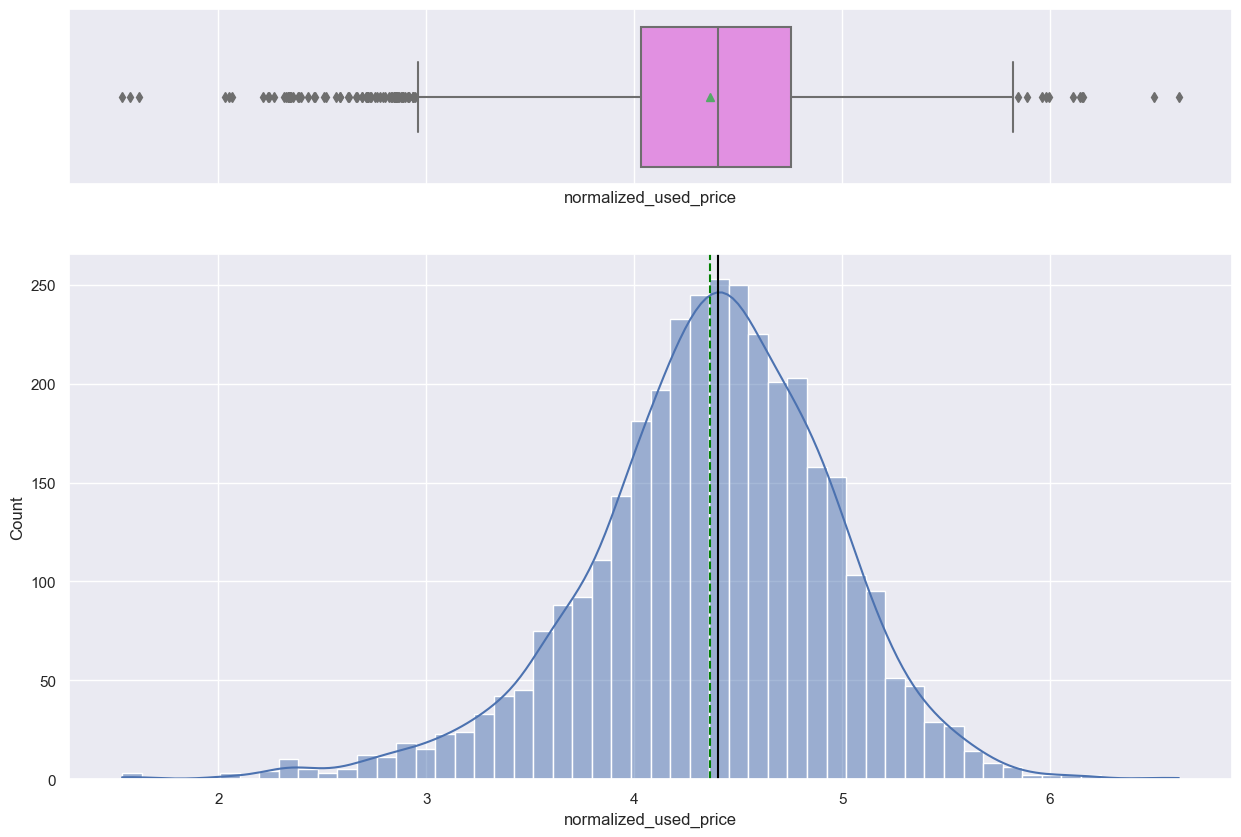

In [265]:
# Analysis for normalized_used_price
# Question 1: What does the distribution of normalized used device prices look like?
histogram_boxplot(df, "normalized_used_price", kde=True)

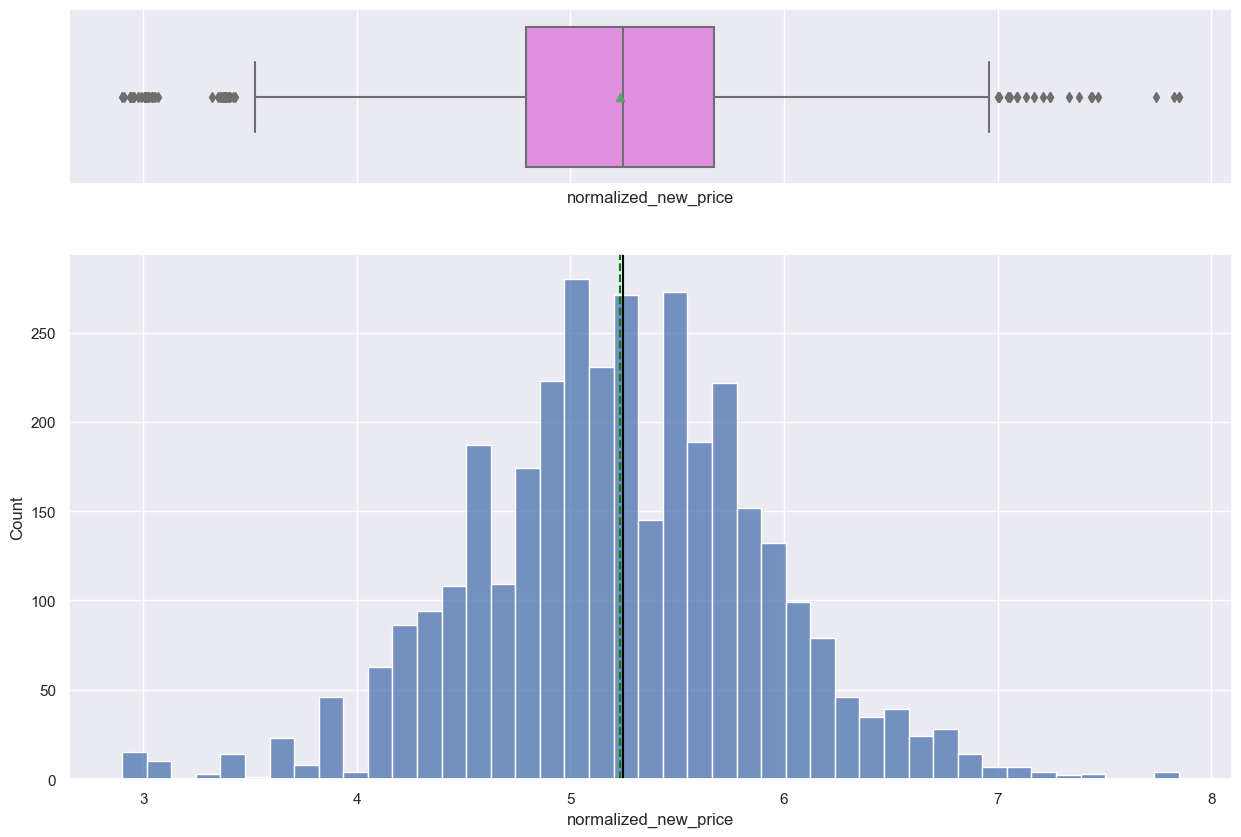

In [266]:
# The distribution is normal with a slight left skew and has a fatter tail due to the factors that favor cheap devices such as a lack of 4g and 5g
# Univariate Analysis for normalized_new_price
histogram_boxplot(df, "normalized_new_price")

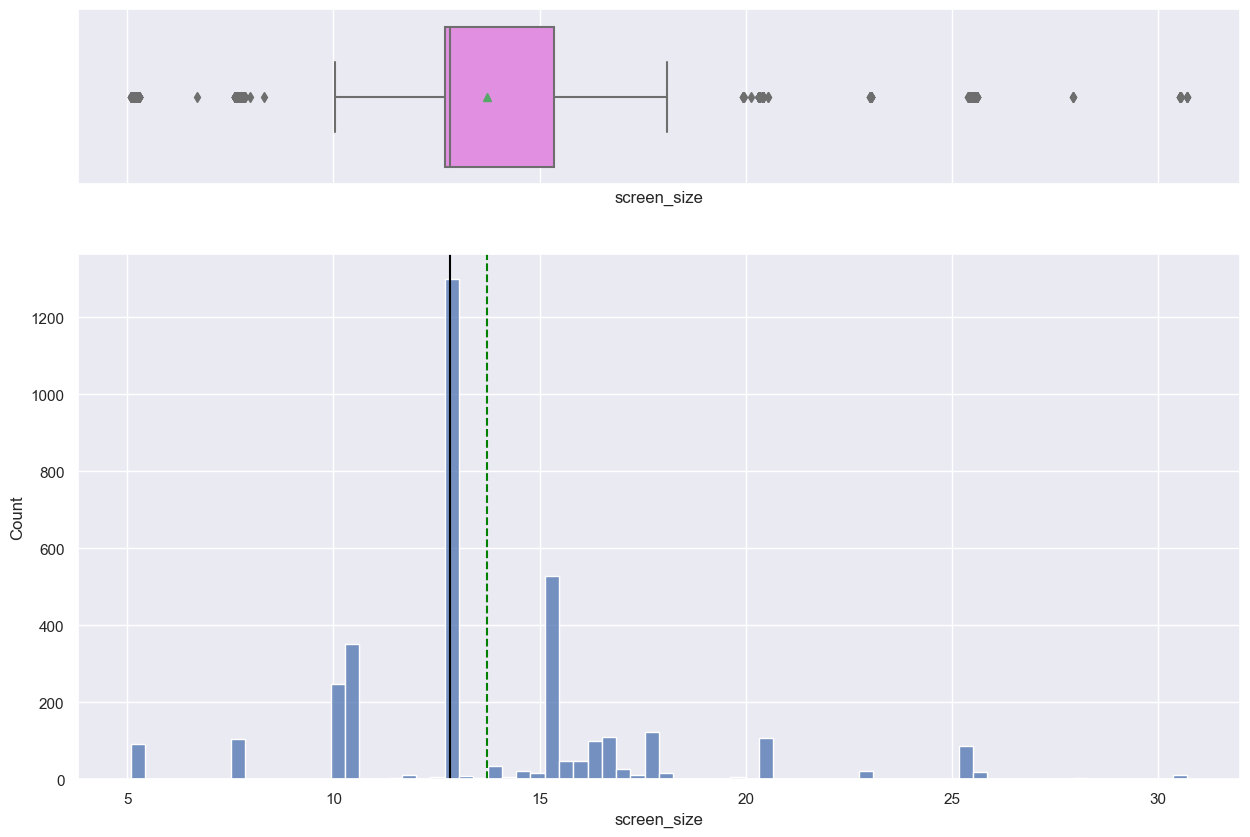

In [267]:
# Analysis for screen size
histogram_boxplot(df, "screen_size")

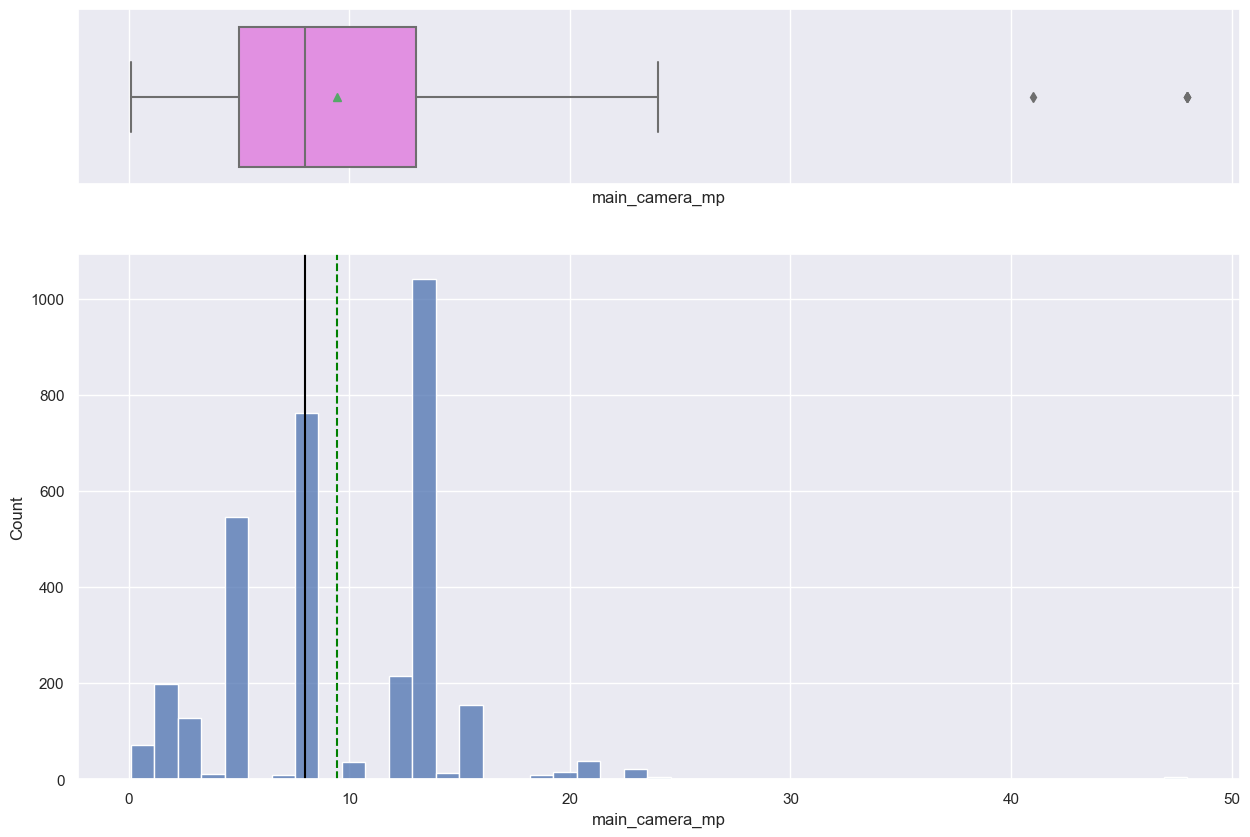

In [268]:
# Analysis for main camera mp
histogram_boxplot(df, "main_camera_mp")

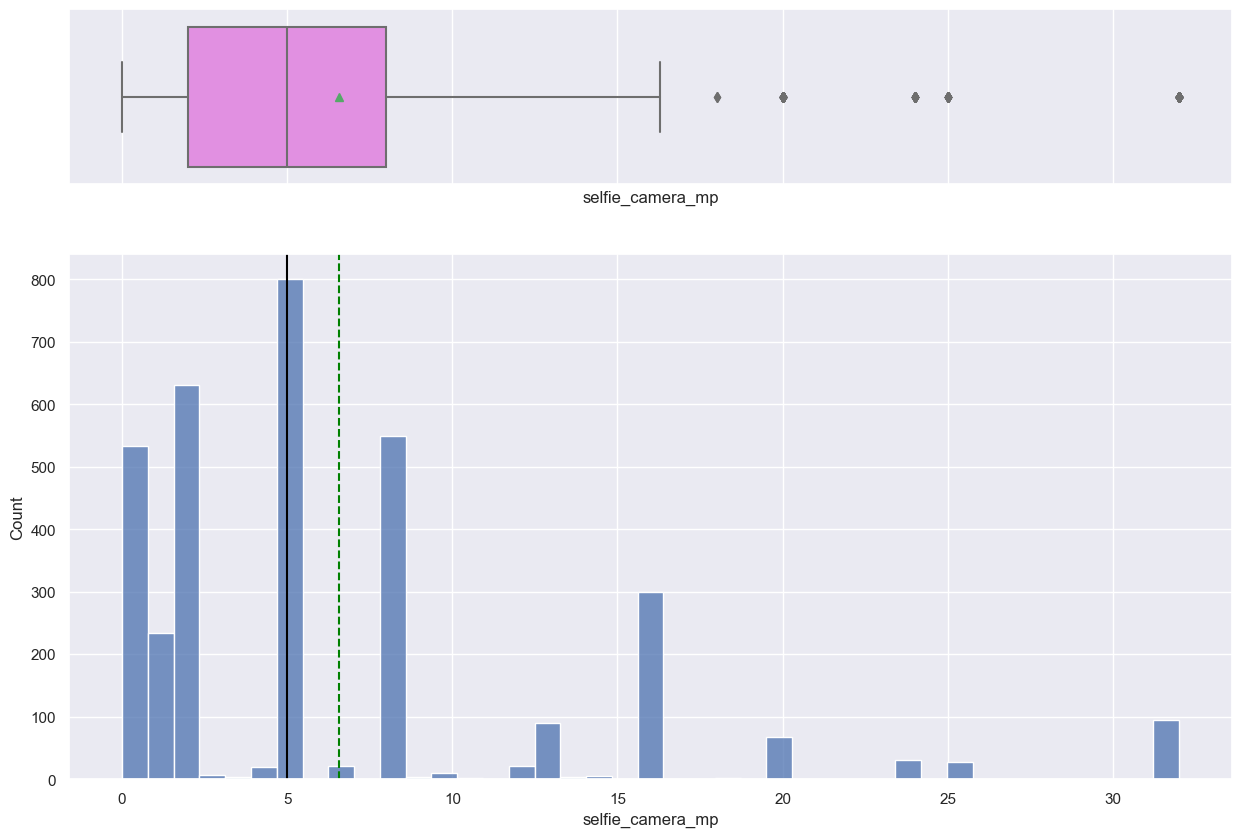

In [269]:
# Analysis for selfie camera mp
histogram_boxplot(df, "selfie_camera_mp")

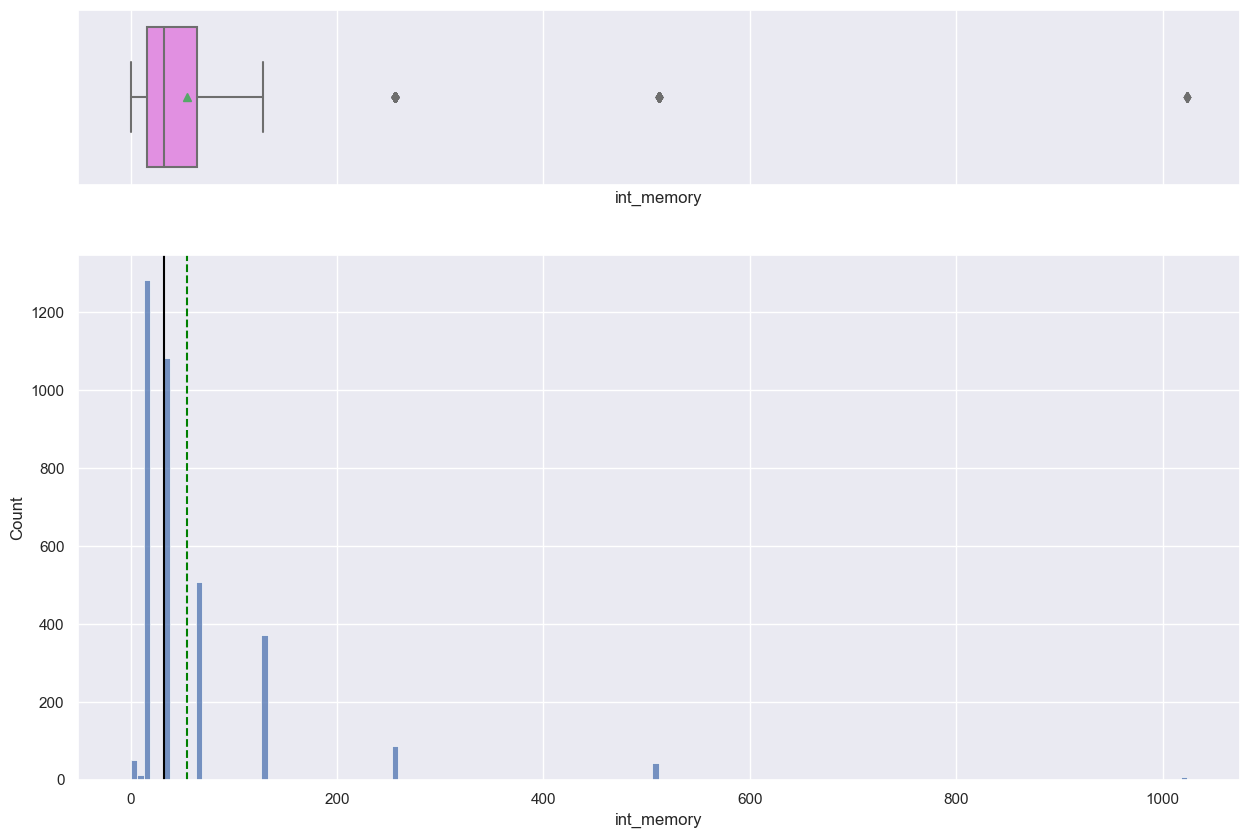

In [270]:
# Analysis for int memory
histogram_boxplot(df, "int_memory")

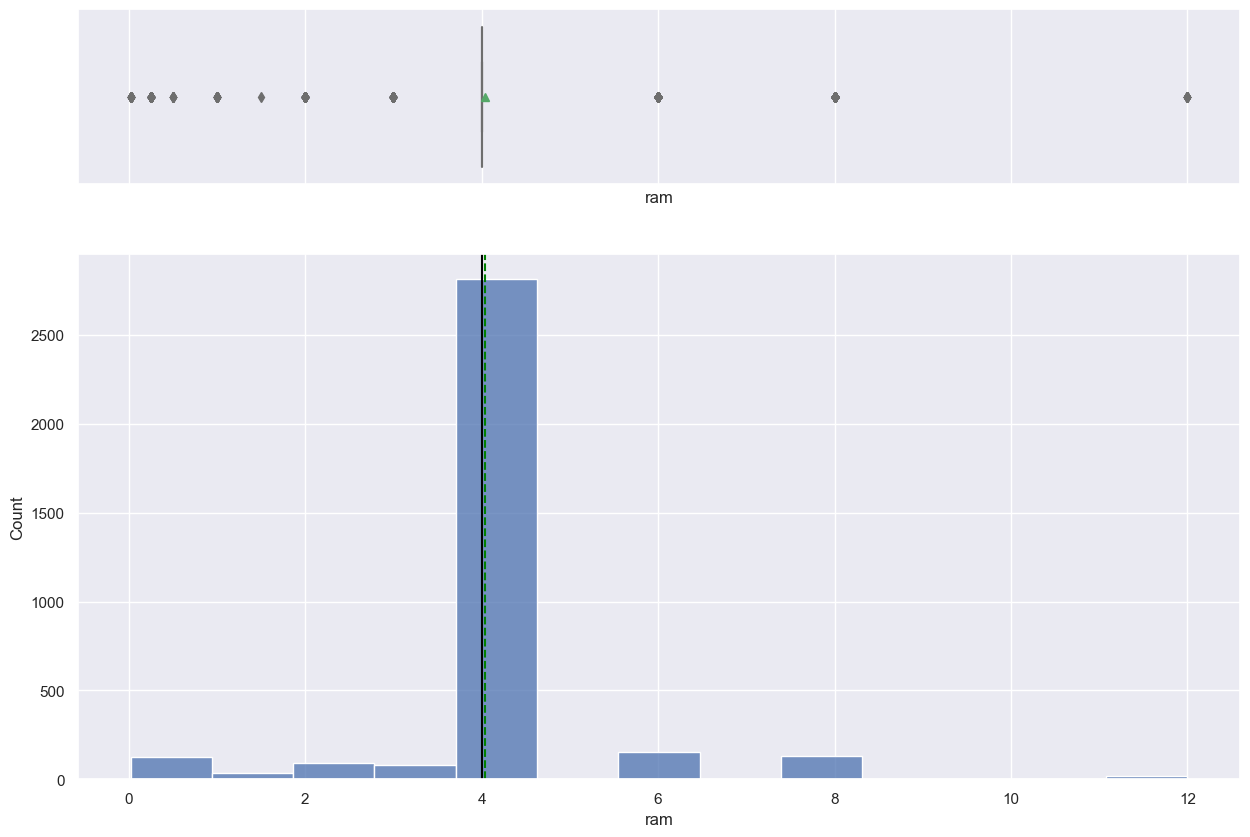

In [271]:
# Analysis for ram
histogram_boxplot(df, "ram")

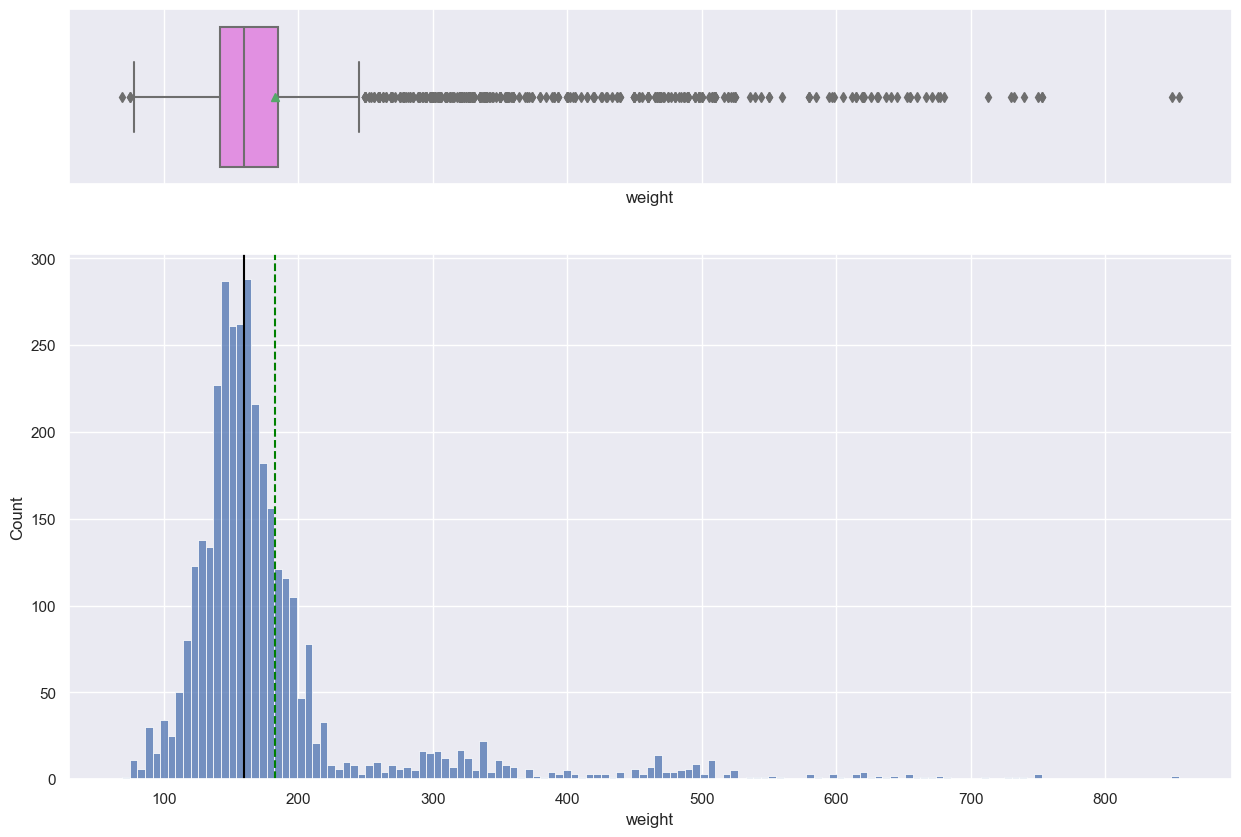

In [272]:
# Analysis for weight
histogram_boxplot(df, "weight")

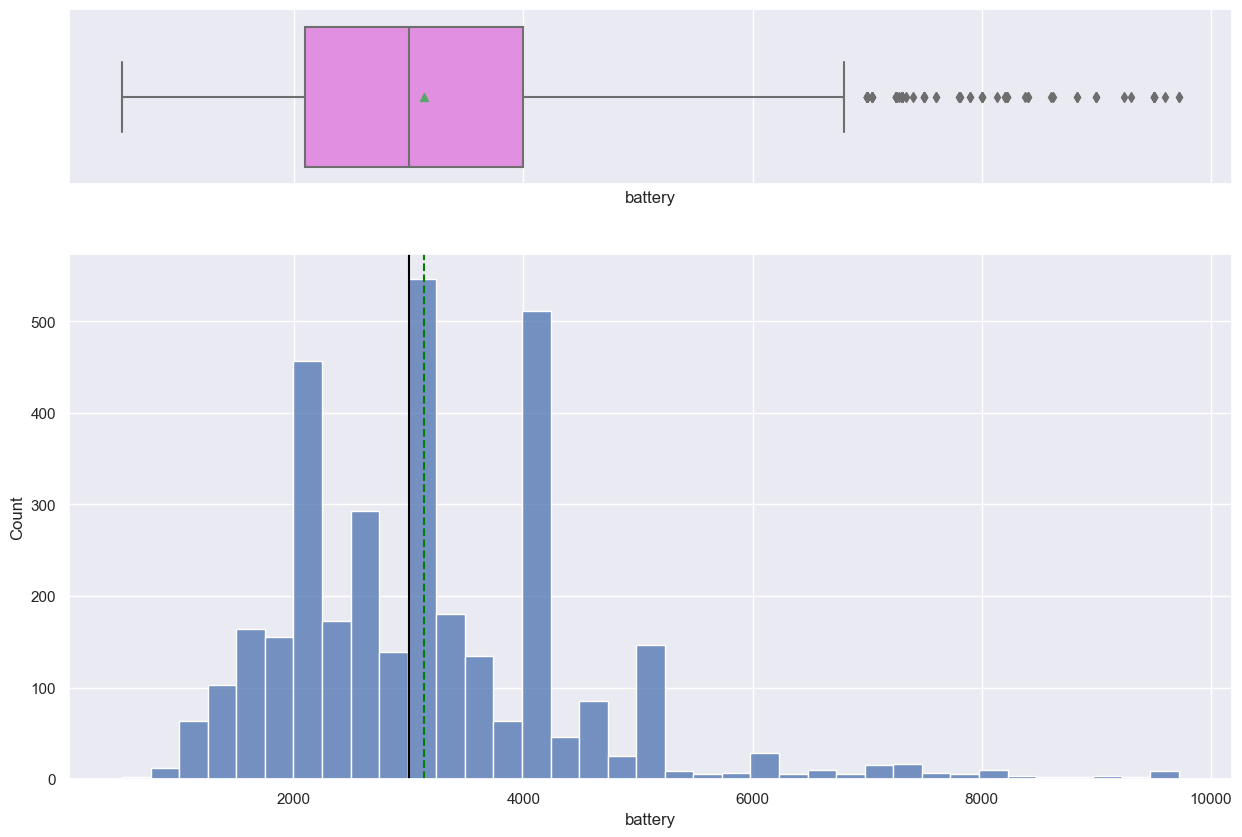

In [273]:
# Analysis for battery
histogram_boxplot(df, "battery")

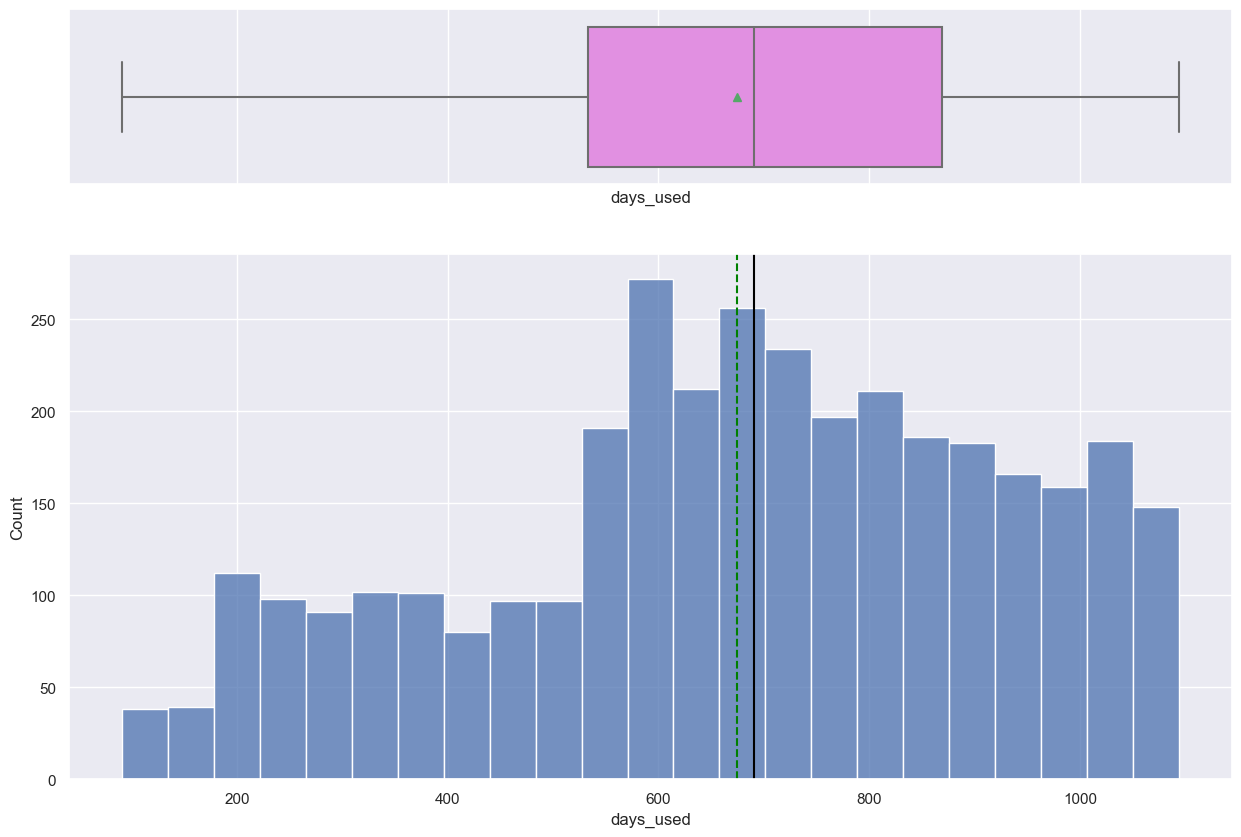

In [274]:
# Analysis for days_used
histogram_boxplot(df, "days_used")

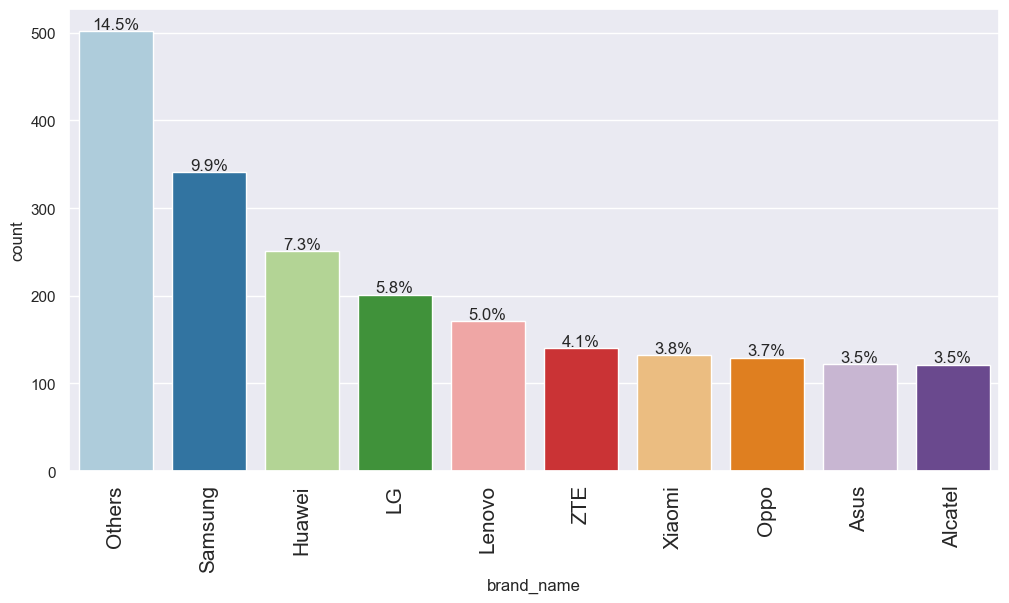

In [275]:
# Analysis for brand name
labeled_barplot(df, "brand_name", perc=True, n=10)

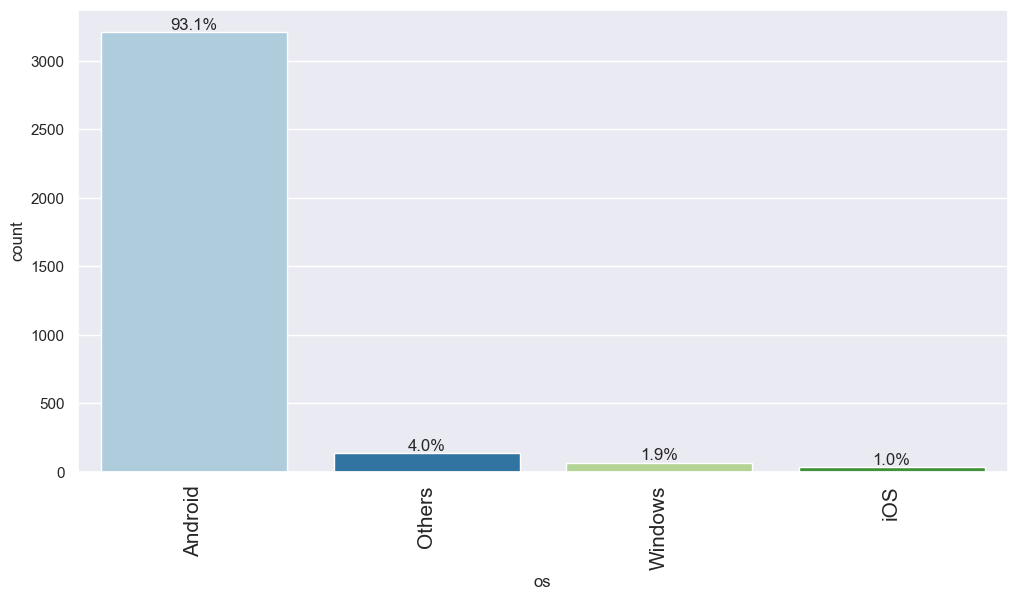

In [276]:
# Analysis for OS
# Question 1: What percentage of the used device market is dominated by Android devices?
labeled_barplot(df, "os", perc=True, n=10)

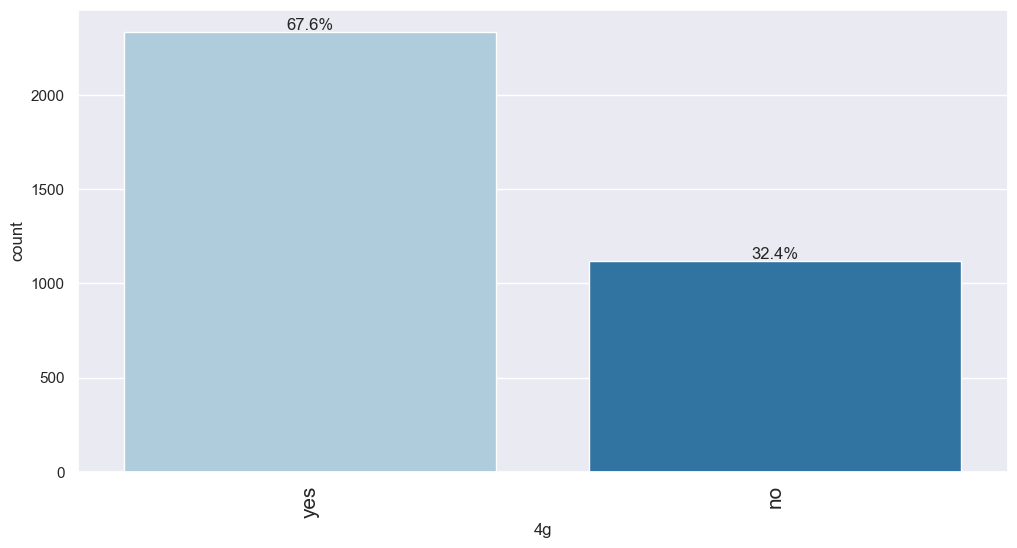

In [277]:
# 93% of devices are used by Android
# Analysis for 4g
labeled_barplot(df, "4g", perc=True, n=10)

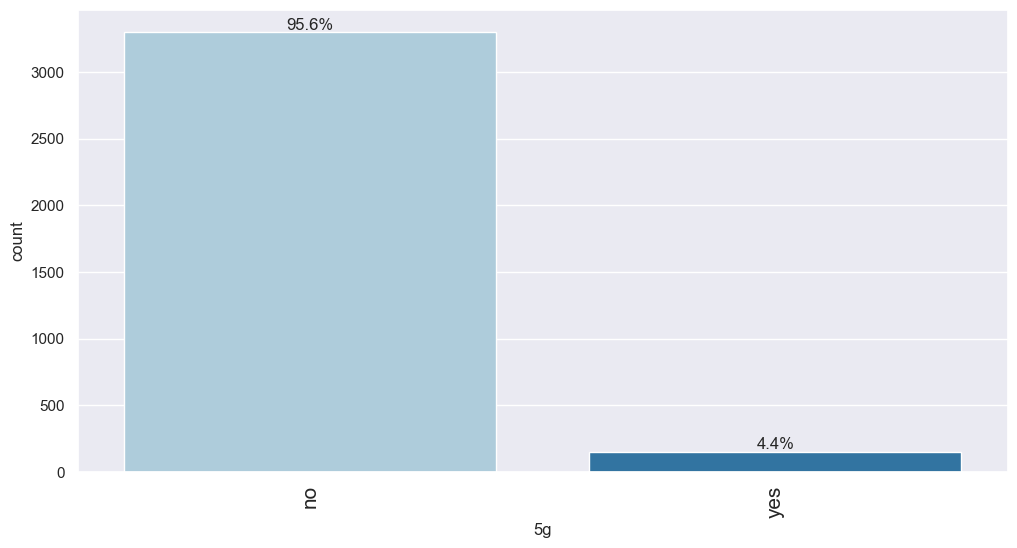

In [278]:
# Analysis for 5g
labeled_barplot(df, "5g", perc=True, n=10)

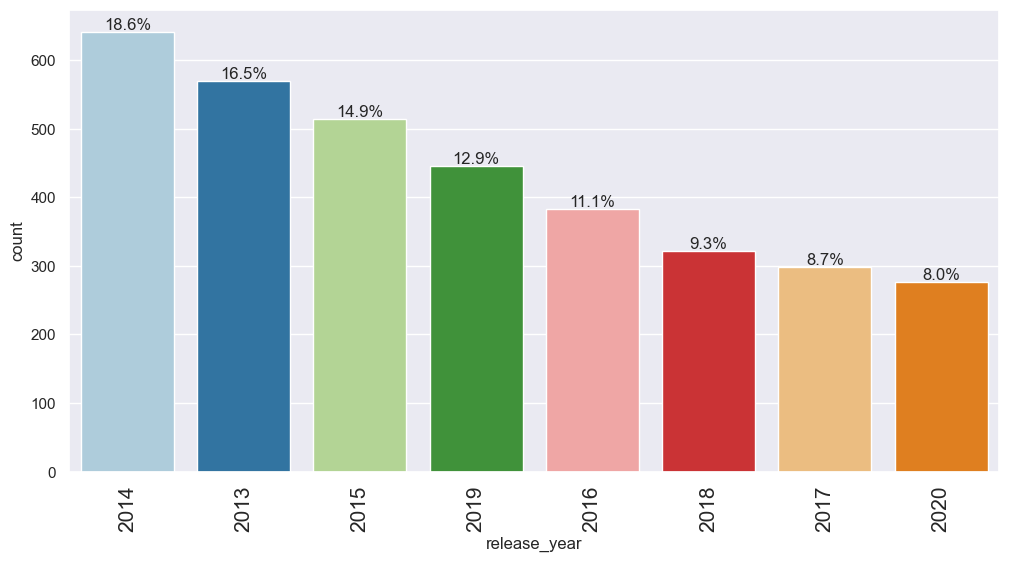

In [279]:
# Analysis for release year
labeled_barplot(df, "release_year", perc=True, n=10)

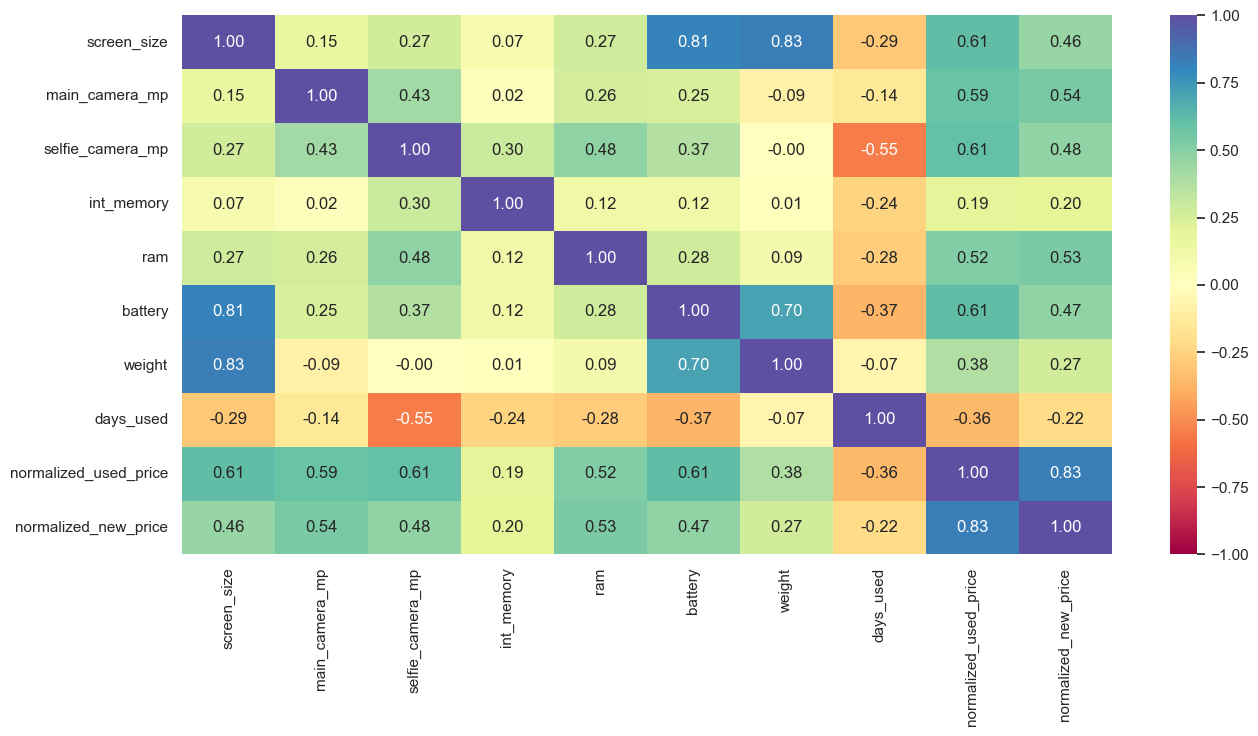

In [280]:
# Bivariate Analysis

# Correlation Check
cols_list = df.select_dtypes(include=np.number).columns.tolist()
# dropping release_year as it is a temporal variable
cols_list.remove("release_year")

plt.figure(figsize=(15, 7))
sns.heatmap(
    df[cols_list].corr(), annot=True, vmin=-1, vmax=1, fmt=".2f", cmap="Spectral"
)
plt.show()

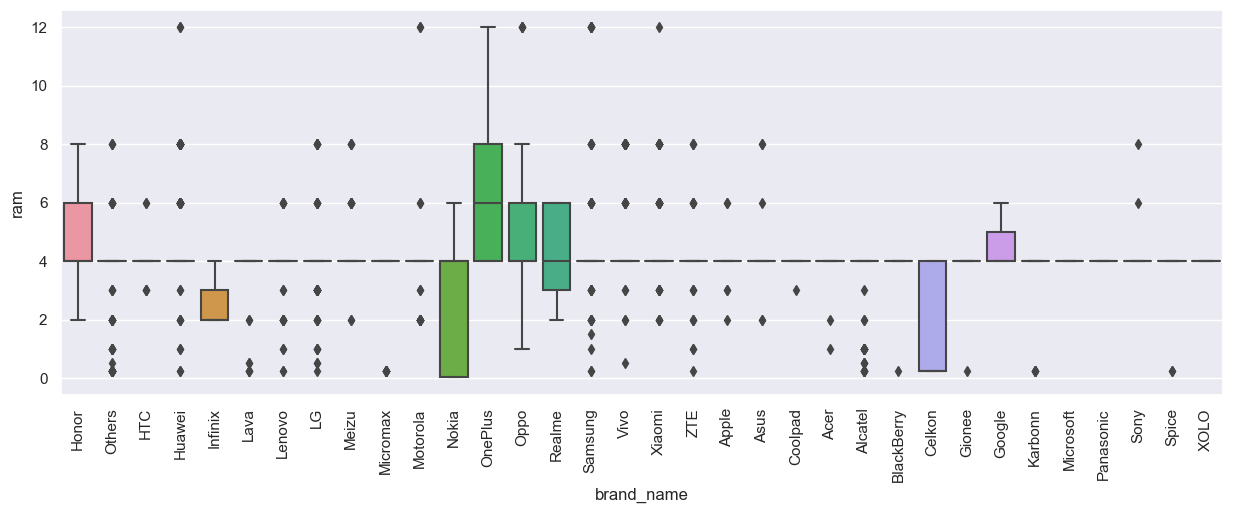

In [281]:
# Question 3: The amount of RAM is important for the smooth functioning of a device. How does the amount of RAM very with the brand?
# Creating a boxplot for correlation between 
plt.figure(figsize=(15, 5))
sns.boxplot(data=df, x="brand_name", y="ram")
plt.xticks(rotation=90)
plt.show()

In [282]:
# The battery tends to be lower for brands suck as Lenovo, Nokia, Samsung, ZTE while OnePlus, Oppo, and RealMe but are very similar for the most part
# Question 4: A large battery often increases a device's weight, making it feel uncomfortable in the hamds. How does the weight vary for phones and tablets offering large batters (more than 4500 mAh)?
# Creating a new dataframe of only those devices which offer a large battery
df_large_battery = df[df.battery > 4500]
df_large_battery.shape

(341, 15)

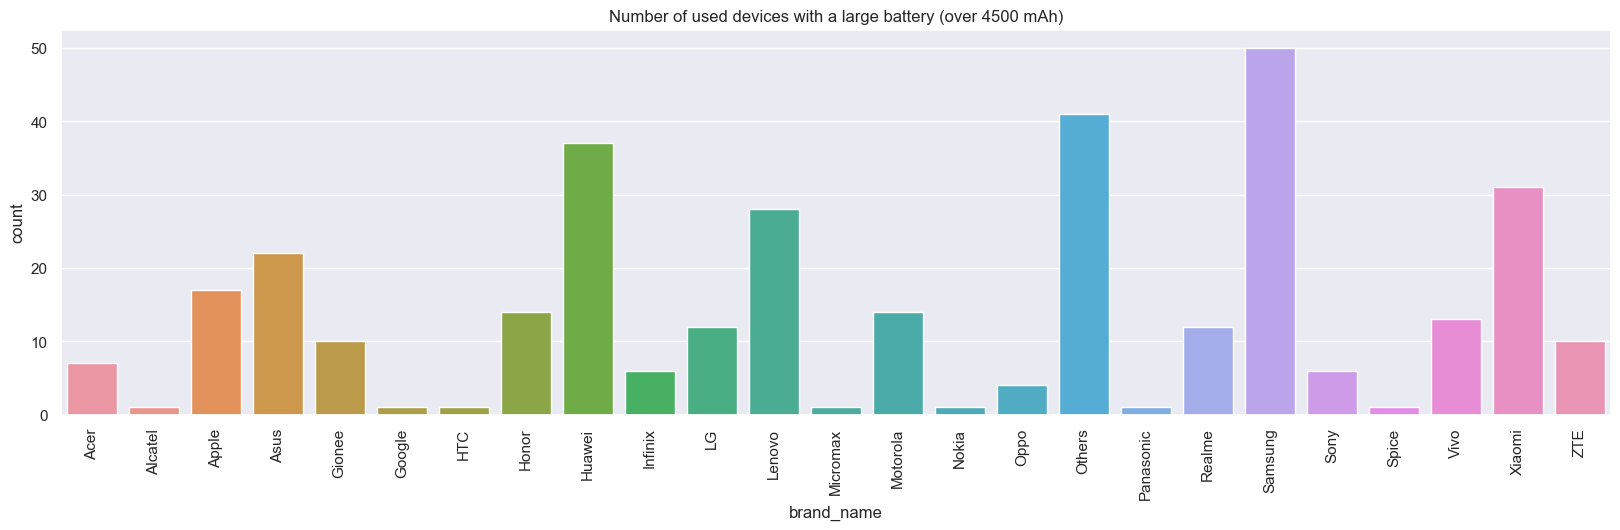

In [283]:
# There are 341 devicess which have a considerably large battery
# Creating a boxplot for correlation between brand_name and weight
plt.figure(figsize=(20,5))
ax = sns.countplot(data = df_large_battery.sort_values("brand_name", ascending=True), x = "brand_name");
plt.xticks(rotation=90)
plt.title("Number of used devices with a large battery (over 4500 mAh)")
for p in ax.patches:
    label = p.get_height()
    x = p.get_x() + p.get_width() / 2 
    y = p.get_height() 
plt.show()

In [284]:
# Samsung, Huawei and, Lenovo generally have a large # of used devices with a large battery 
# Question 5: Biggers screens are deisrable for entertainment purposes as they offer a better viewing experience. How many phoones and tablets are available across different brands with a screen size larger than 6 inches?
df_big_screen = df[df.screen_size > 15.24]
df_big_screen.shape

(1099, 15)

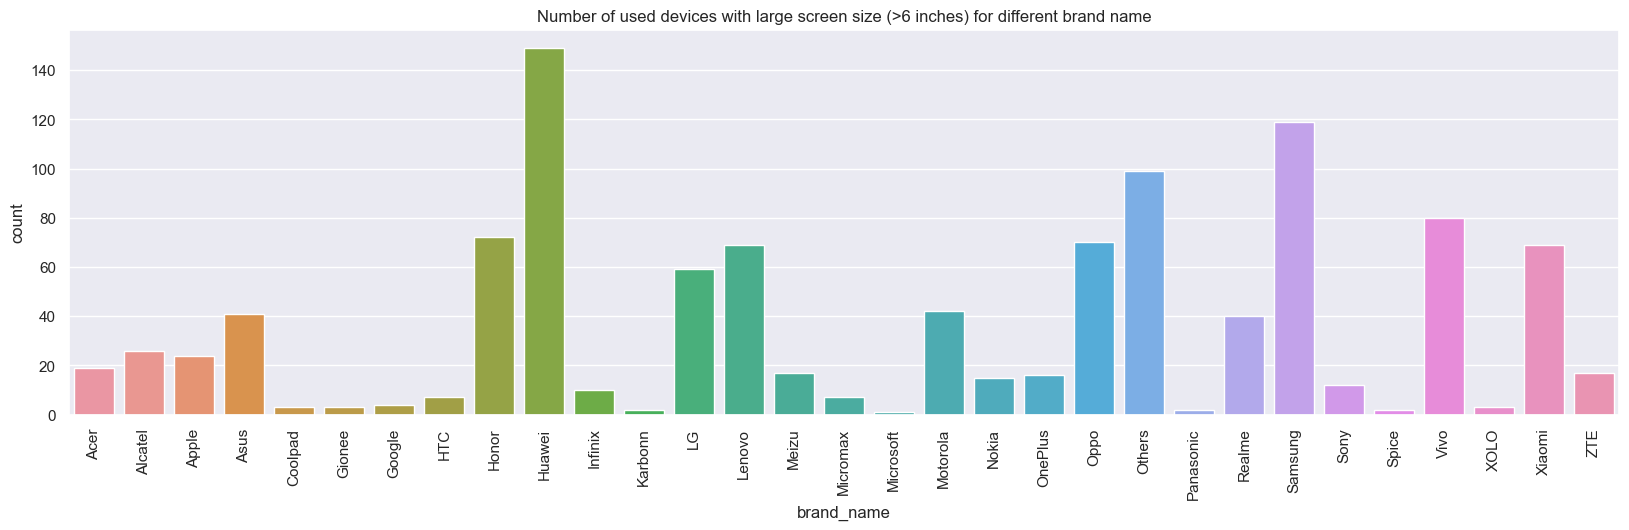

In [285]:
# There are 1099 devices with a screen larger than the desirable size value of 6 inches
# Creating a boxplot for correlation between brand_name and screen_size
plt.figure(figsize=(20,5))

ax = sns.countplot(data = df_big_screen.sort_values("brand_name", ascending=True), x = "brand_name");
plt.xticks(rotation=90)
plt.title("Number of used devices with large screen size (>6 inches) for different brand name")
for p in ax.patches:
    label = p.get_height()
    x = p.get_x() + p.get_width() / 2 
    y = p.get_height() 
plt.show()

In [286]:
# Most of the phone brands with a small screen size also have a small battery and there is more or less a direct correlation betweeen both of the values
# Huwaei, Others, and Samsung generally have a greater amount of large screen devices while Google, Microsoft, and Panasonic generally have a lower amount of large screen devices
# Question 6: A lot of devices nowadays offer great selfie cameras, allowing us to capture our favorite moments with loved ones. What is the distributioon of devices offering greater than 8MP selfie cameras across brands?
df_large_camera = df[df.selfie_camera_mp > 8]
df_large_camera.shape

(655, 15)

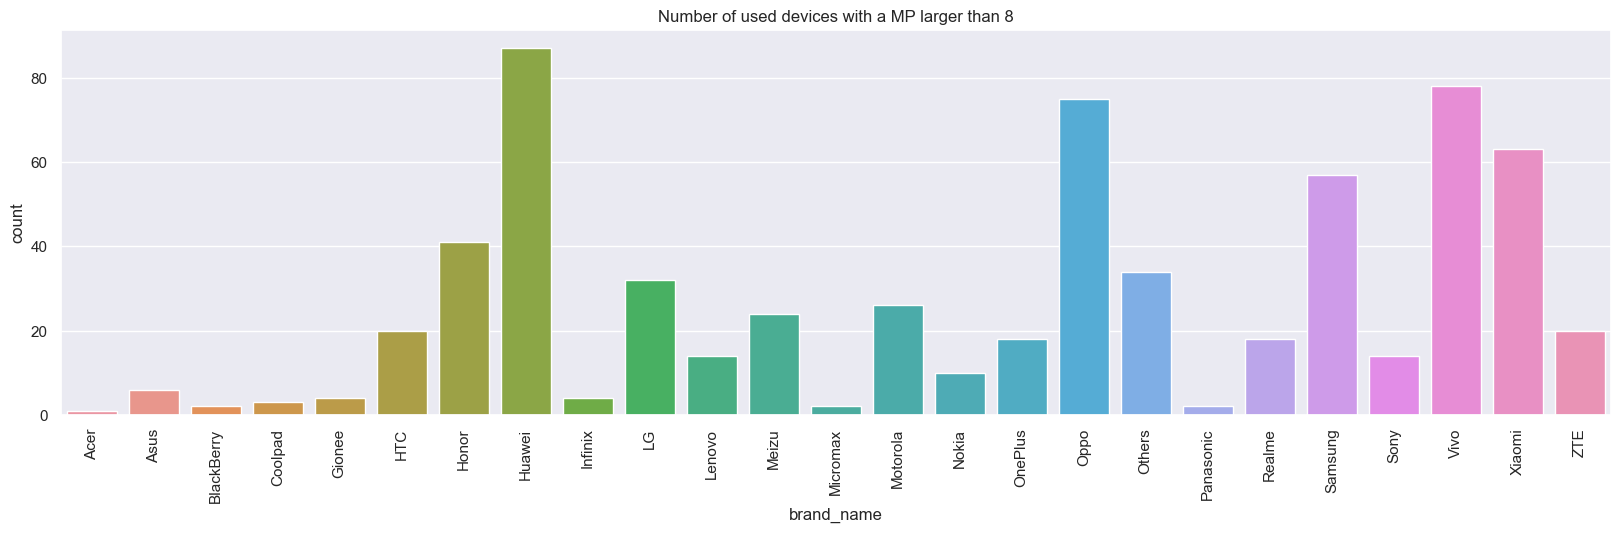

In [287]:
# There are 655 selfie cameras which have a MegaPixel greater than 8
# Creating a boxplot for correlation between brand_name and camera_shape
plt.figure(figsize=(20,5))

ax = sns.countplot(data = df_large_camera.sort_values("brand_name", ascending=True), x = "brand_name");
plt.xticks(rotation=90)
plt.title("Number of used devices with a MP larger than 8")
for p in ax.patches:
    label = p.get_height()
    x = p.get_x() + p.get_width() / 2 
    y = p.get_height() 
plt.show()

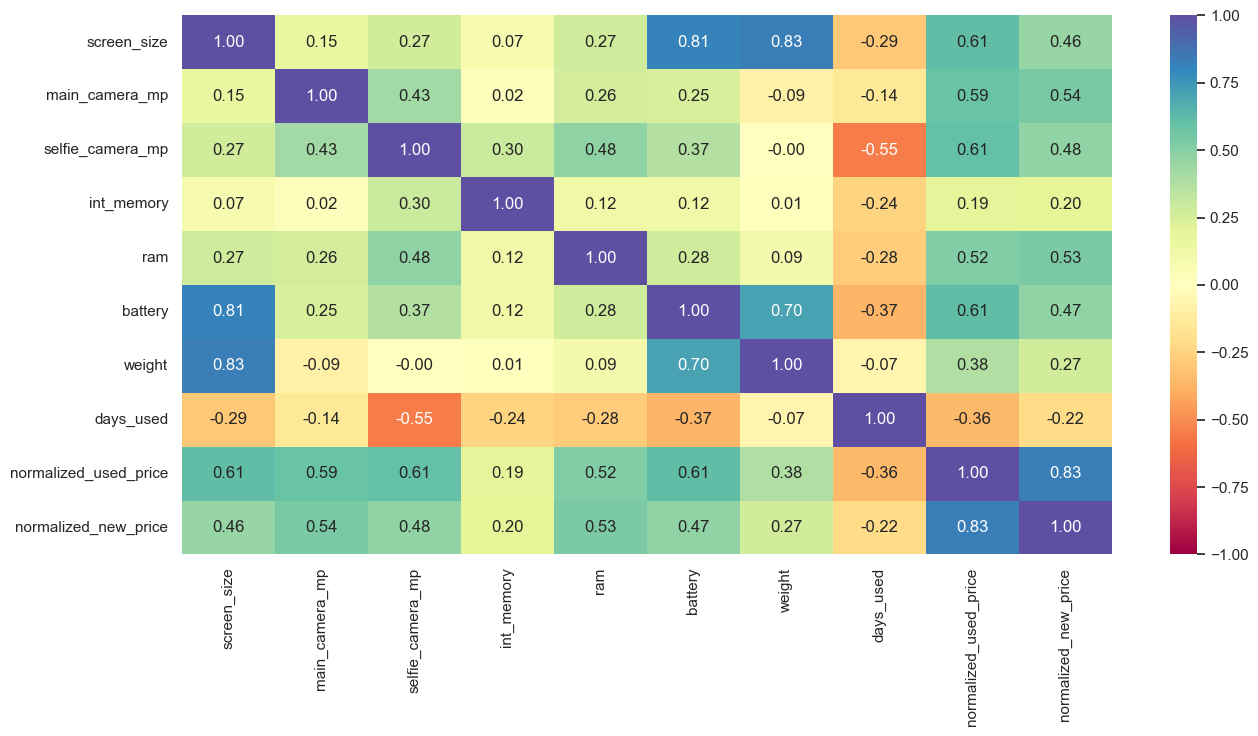

In [288]:
# Correlation Check
cols_list = df.select_dtypes(include=np.number).columns.tolist()
# dropping release_year as it is a temporal variable
cols_list.remove("release_year")

plt.figure(figsize=(15, 7))
sns.heatmap(
    df[cols_list].corr(), annot=True, vmin=-1, vmax=1, fmt=".2f", cmap="Spectral"
)
plt.show()

In [289]:
# As you can see in the data, Huawei, Opp, Samsung, and Vivo are generally having a greater amount of used devices with a MP larger than 8
# Question 7: Which attributes are highly correlated with the normalized price of a used device?
# If we look at the correlation check, while the used price obviously influences the new price, There are factors which generally have a moderate correlation to influence
# the device such as main_camera_mp and selfie_camera_mp. The RAM and Screen size are also huge factors to the price.
# Also since the MP correlates with the battery heavily, we can say that the battery influences price decisions.


#Data Pre=Processing
# Missing value treatment
# We will fill in all the null values with the media
df.isnull().sum()

brand_name                 0
os                         0
screen_size                0
4g                         0
5g                         0
main_camera_mp           179
selfie_camera_mp           2
int_memory                 4
ram                        4
battery                    6
weight                     7
release_year               0
days_used                  0
normalized_used_price      0
normalized_new_price       0
dtype: int64

In [290]:
df['main_camera_mp'] = df['main_camera_mp'].fillna(df['main_camera_mp'].median())
df['selfie_camera_mp'] = df['selfie_camera_mp'].fillna(df['selfie_camera_mp'].median())
df['int_memory'] = df['int_memory'].fillna(df['int_memory'].median())
df['ram'] = df['ram'].fillna(df['ram'].median())
df['battery'] = df['battery'].fillna(df['battery'].median())
df['weight'] = df['weight'].fillna(df['weight'].median())


 # filling the data with median values

In [291]:
df.isnull().sum()

brand_name               0
os                       0
screen_size              0
4g                       0
5g                       0
main_camera_mp           0
selfie_camera_mp         0
int_memory               0
ram                      0
battery                  0
weight                   0
release_year             0
days_used                0
normalized_used_price    0
normalized_new_price     0
dtype: int64

In [292]:
df.tail()

,brand_name,os,screen_size,4g,5g,main_camera_mp,selfie_camera_mp,int_memory,ram,battery,weight,release_year,days_used,normalized_used_price,normalized_new_price
3449,Asus,Android,15.34,yes,no,8.0,8.0,64.0,6.0,5000.0,190.0,2019,232,4.492337,6.483872
3450,Asus,Android,15.24,yes,no,13.0,8.0,128.0,8.0,4000.0,200.0,2018,541,5.037732,6.251538
3451,Alcatel,Android,15.80,yes,no,13.0,5.0,32.0,3.0,4000.0,165.0,2020,201,4.357350,4.528829
3452,Alcatel,Android,15.80,yes,no,13.0,5.0,32.0,2.0,4000.0,160.0,2020,149,4.349762,4.624188
3453,Alcatel,Android,12.83,yes,no,13.0,5.0,16.0,2.0,4000.0,168.0,2020,176,4.132122,4.279994


C:\Users\Aryaman\AppData\Local\Temp\ipykernel_18720\3230335691.py:10: UserWarning: The figure layout has changed to tight
  plt.tight_layout(pad=2)
C:\Users\Aryaman\AppData\Local\Temp\ipykernel_18720\3230335691.py:10: UserWarning: The figure layout has changed to tight
  plt.tight_layout(pad=2)
C:\Users\Aryaman\AppData\Local\Temp\ipykernel_18720\3230335691.py:10: UserWarning: The figure layout has changed to tight
  plt.tight_layout(pad=2)
C:\Users\Aryaman\AppData\Local\Temp\ipykernel_18720\3230335691.py:10: UserWarning: The figure layout has changed to tight
  plt.tight_layout(pad=2)
C:\Users\Aryaman\AppData\Local\Temp\ipykernel_18720\3230335691.py:10: UserWarning: The figure layout has changed to tight
  plt.tight_layout(pad=2)
C:\Users\Aryaman\AppData\Local\Temp\ipykernel_18720\3230335691.py:10: UserWarning: The figure layout has changed to tight
  plt.tight_layout(pad=2)
C:\Users\Aryaman\AppData\Local\Temp\ipykernel_18720\3230335691.py:10: UserWarning: The figure layout has changed

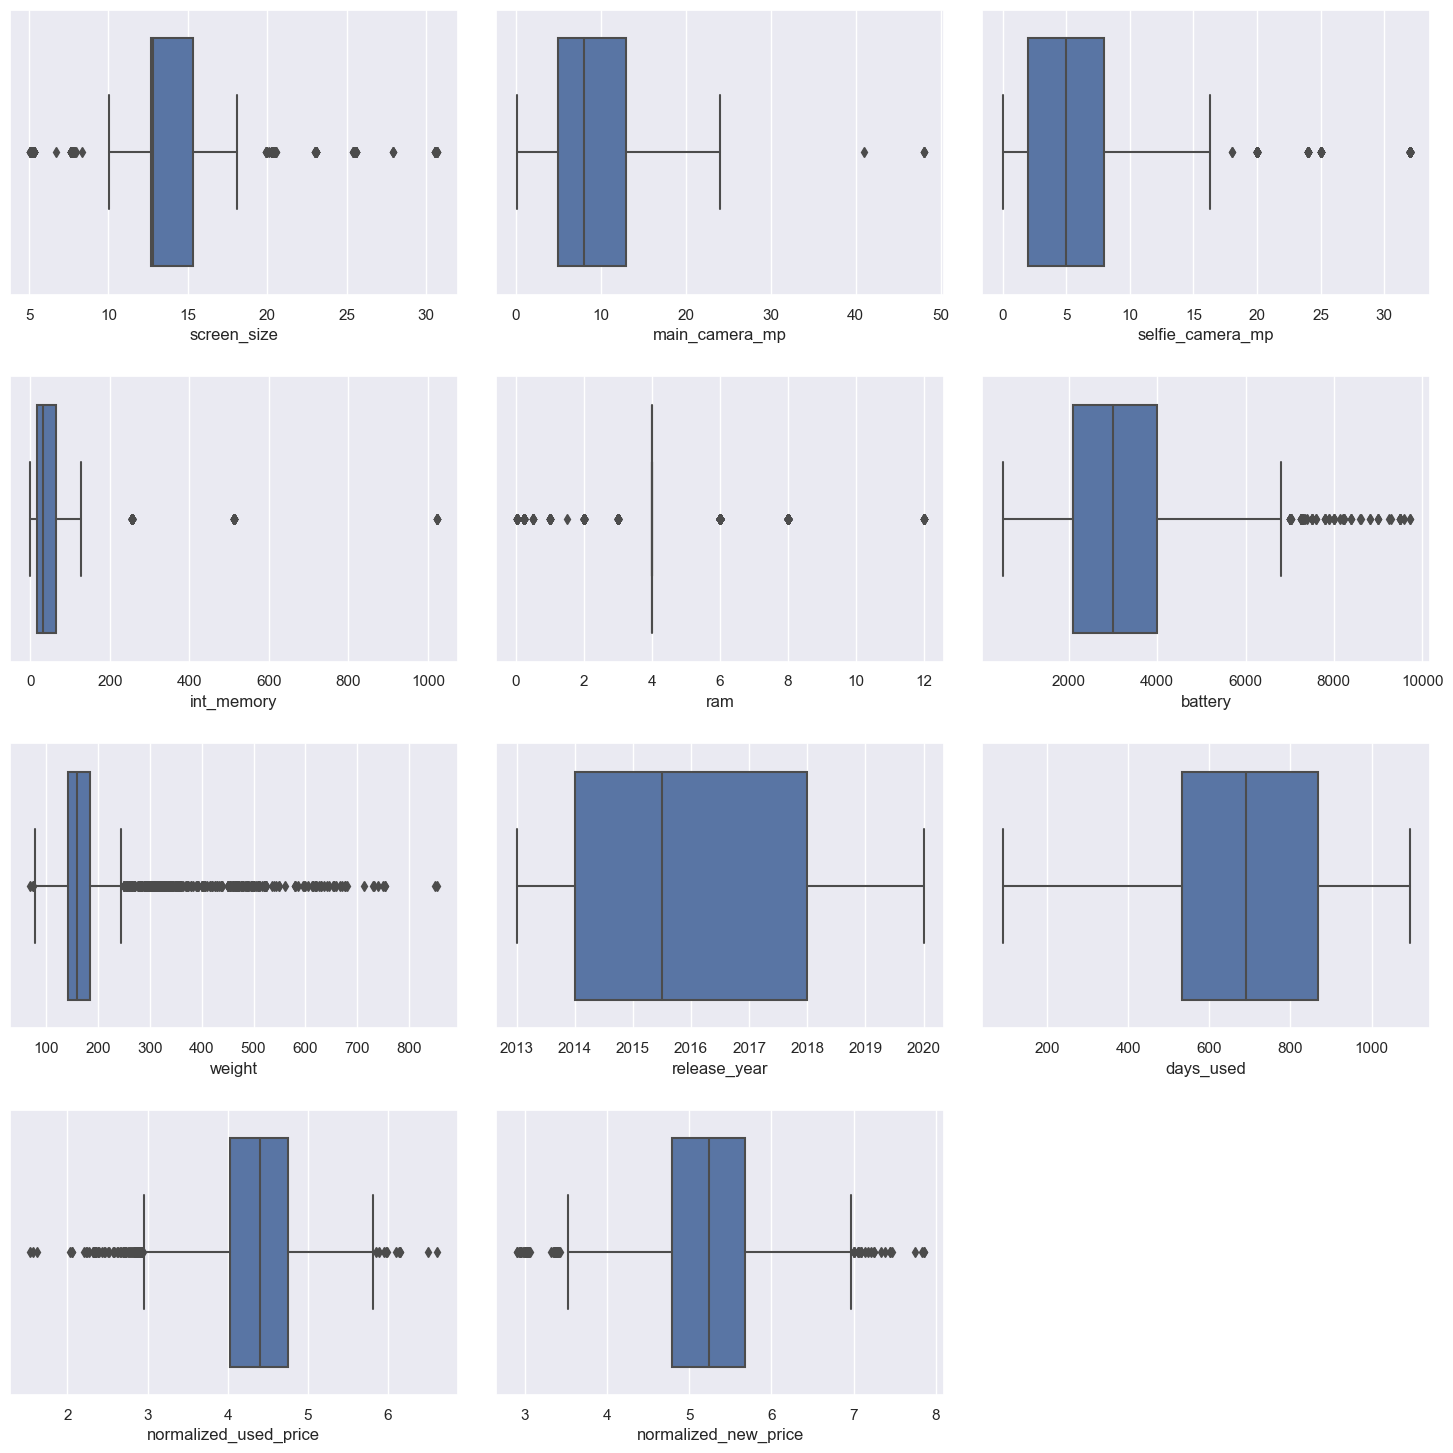

In [293]:
# Since it mostly looks good, we will go on to do the outlier Check
# Checking for outliers in the data
num_cols = df.select_dtypes(include=np.number).columns.tolist()

plt.figure(figsize=(15, 15))

for i, variable in enumerate(num_cols):
    plt.subplot(4, 3, i + 1)
    sns.boxplot(data=df, x=variable)
    plt.tight_layout(pad=2)

plt.show()

In [294]:
# Since the ram looks like a general outlier, we will take it out of the table
df.drop("ram", axis=1, inplace=True)

In [295]:
num_cols.remove("ram")

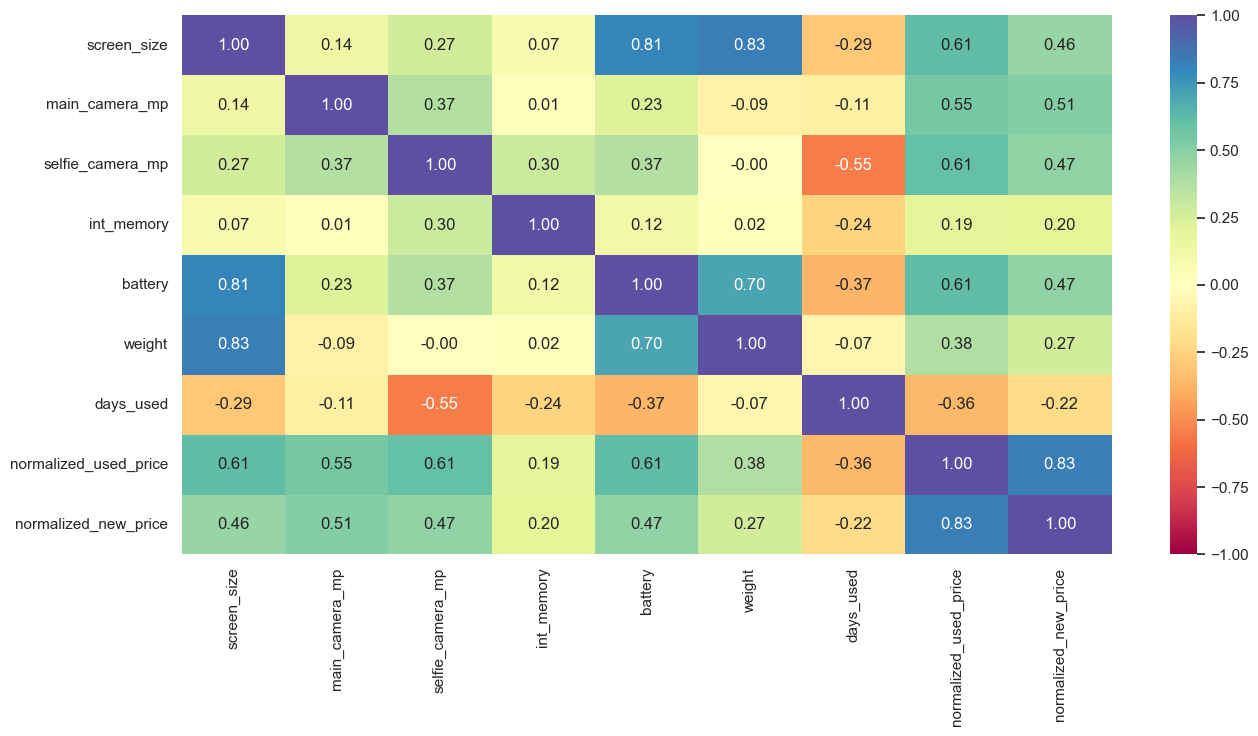

In [296]:
num_cols = df.select_dtypes(include=np.number).columns.tolist()
num_cols.remove("release_year") #as it is a temporal variable

plt.figure(figsize=(15, 7))
sns.heatmap(df[num_cols].corr(), annot=True, vmin=-1, vmax=1, fmt=".2f", cmap="Spectral")
plt.show()

In [297]:
# Data preparation for modeling
X = df.drop(["normalized_used_price","release_year"],axis=1)
y = df["normalized_used_price"]

In [298]:
print(X.head())
print()
print(y.head())

  brand_name       os  screen_size   4g   5g  main_camera_mp  \
0      Honor  Android        14.50  yes   no            13.0   
1      Honor  Android        17.30  yes  yes            13.0   
2      Honor  Android        16.69  yes  yes            13.0   
3      Honor  Android        25.50  yes  yes            13.0   
4      Honor  Android        15.32  yes   no            13.0   

   selfie_camera_mp  int_memory  battery  weight  days_used  \
0               5.0        64.0   3020.0   146.0        127   
1              16.0       128.0   4300.0   213.0        325   
2               8.0       128.0   4200.0   213.0        162   
3               8.0        64.0   7250.0   480.0        345   
4               8.0        64.0   5000.0   185.0        293   

   normalized_new_price  
0              4.715100  
1              5.519018  
2              5.884631  
3              5.630961  
4              4.947837  

0    4.307572
1    5.162097
2    5.111084
3    5.135387
4    4.389995
Name: nor

In [299]:
# Adding the intercept to the data
X = sm.add_constant(X)
# Encoding the categorical variables
X = pd.get_dummies(
    X,
    columns=X.select_dtypes(include=["object", "category"]).columns.tolist(), 
    drop_first=True,
)
X = X.apply(pd.to_numeric, errors='coerce')
X = X.astype(int)
print(X.shape)
X.head()

(3454, 47)


,const,screen_size,main_camera_mp,selfie_camera_mp,int_memory,battery,weight,days_used,normalized_new_price,brand_name_Alcatel,...,brand_name_Spice,brand_name_Vivo,brand_name_XOLO,brand_name_Xiaomi,brand_name_ZTE,os_Others,os_Windows,os_iOS,4g_yes,5g_yes
0,1,14,13,5,64,3020,146,127,4,0,...,0,0,0,0,0,0,0,0,1,0
1,1,17,13,16,128,4300,213,325,5,0,...,0,0,0,0,0,0,0,0,1,1
2,1,16,13,8,128,4200,213,162,5,0,...,0,0,0,0,0,0,0,0,1,1
3,1,25,13,8,64,7250,480,345,5,0,...,0,0,0,0,0,0,0,0,1,1
4,1,15,13,8,64,5000,185,293,4,0,...,0,0,0,0,0,0,0,0,1,0


In [300]:
# Splitting the data in a 70:30 ratio for train to test data

x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=1)

In [301]:
print("Number of rows in train data =", x_train.shape[0])
print("Number of rows in test data =", x_test.shape[0])

Number of rows in train data = 2417
Number of rows in test data = 1037


In [302]:
olsmodel1 = sm.OLS(y_train, x_train).fit()
print(olsmodel1.summary())

                              OLS Regression Results                             
Dep. Variable:     normalized_used_price   R-squared:                       0.813
Model:                               OLS   Adj. R-squared:                  0.810
Method:                    Least Squares   F-statistic:                     224.5
Date:                   Tue, 02 Jan 2024   Prob (F-statistic):               0.00
Time:                           08:46:08   Log-Likelihood:                -99.765
No. Observations:                   2417   AIC:                             293.5
Df Residuals:                       2370   BIC:                             565.7
Df Model:                             46                                         
Covariance Type:               nonrobust                                         
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------


In [303]:
# Results of the regression
# R-Square - generally reflects the fit of the model and it ranged from 0 to 1 where 0 has no correlation and 1 means a complete correlation

# Since the r^2 is around 0.813 which means a generally good fit.

# The constant coeffecient is the Y-Intercept which is around 1.98
# This should generally mean that if the variable coeffecients are zero, then the output would be equal to the const coeffecient.
# The Coeffecient of a predictor variable represents the change in the output Y due to a change in the predictor variable


# Model Performance Check

# Checking the performance with different metrics
# Using metric functions defined in sklearn for RMSE, MAE< and R^2
# Defining functions to calculate MAPE and R^2
# Creating a function which will print out all the above metrics

# Function to compute adjusted R-Squared
def adj_r2_score(predictors, targets, predictions):
    r2 = r2_score(targets, predictions)
    n = predictors.shape[0]
    k = predictors.shape[1]
    return 1 - ((1 - r2) * (n - 1) / (n - k - 1))

# Function to compute MAPE
def mape_score(targets, predictions):
    return np.mean(np.abs(targets - predictions) / targets) * 100

# Function to compute different metrics to check the performance of a regression model
def model_performance_regression(model, predictors, target):
    """
    Function to compute different metrics to check regression model performance

    model: regressor
    predictors: independent variables
    target: dependent variable
    """

    # predicting using the independent variables
    pred = model.predict(predictors)

    r2 = r2_score(target, pred)  # to compute R-squared
    adjr2 = adj_r2_score(predictors, target, pred)  # to compute adjusted R-squared
    rmse = np.sqrt(mean_squared_error(target, pred))  # to compute RMSE
    mae = mean_absolute_error(target, pred)  # to compute MAE
    mape = mape_score(target, pred)  # to compute MAPE

    # creating a dataframe of metrics
    df_perf = pd.DataFrame(
        {
            "RMSE": rmse,
            "MAE": mae,
            "R-squared": r2,
            "Adj. R-squared": adjr2,
            "MAPE": mape,
        },
        index=[0],
    )

    return df_perf

In [304]:
# Checking model performance on a train set (around 70 % of the data)
print("Training Performance\n")
olsmodel1_train_perf = model_performance_regression(olsmodel1, x_train, y_train)
olsmodel1_train_perf

Training Performance



,RMSE,MAE,R-squared,Adj. R-squared,MAPE
0,0.252167,0.19483,0.813357,0.809654,4.676772


In [305]:
# Checking model performance on a test set (around 30% of the data)
print("Test Performance\n")
olsmodel1_test_perf = model_performance_regression(olsmodel1, x_test, y_test)
olsmodel1_test_perf

Test Performance



,RMSE,MAE,R-squared,Adj. R-squared,MAPE
0,0.261991,0.200321,0.809694,0.80065,4.891179


In [306]:
# Some of the observations I have created are
# The training R Squared is 0.81 so the model is not filtering
# The RMSE and MAE are comparable so the model is fitting
# The MAE Suggests that the model can predict normalized used price within a mean error of 0.195
# MAPE of 4.9 on the test data suggests that the prediction of the normalized used price is within 4.9%

In [307]:
# Checking Linear Regression Assumptions
# Checking the following Linear Regression Assumptions:
# 1. No Multicollinearity
# 2. Linearity of variables
# 3. Independence of error terms
# 4. Normality of error terms
# 5. No Heteroscedasticity

# Test for Multicollinearity
# We will test for multicollinearity using VIF

# General Rule of thumb
# - If VIF is 1 then there is no correlation between kth predictor and the remaining predictor variables.
# - If VIF exceeds 5 or is close to exceeding 5, we say there is moderate multicollinearity
# - If VIF is 10 or exceeding 10, it shows signs of high multicollinearity

# Let's define a function to check VIF

from statsmodels.stats.outliers_influence import variance_inflation_factor

def checking_vif(predictors):
    vif = pd.DataFrame()
    vif["feature"] = predictors.columns
    
    # Calculating VIF for each feature
    vif["VIF"] = [
        variance_inflation_factor(predictors.values, i)
        for i in range(len(predictors.columns))
    ]
    return vif
checking_vif(x_train)

,feature,VIF
0,const,176.505800
1,screen_size,7.288821
2,main_camera_mp,2.048381
3,selfie_camera_mp,2.387101
4,int_memory,1.314907
5,battery,3.954329
6,weight,6.074051
7,days_used,1.921547
8,normalized_new_price,2.131637
9,brand_name_Alcatel,3.403433


In [308]:
# There are a few columns with a VIF which is considered to be very high which indicates a prescence of Strong Multicollinearity
# Removing Multicollinearity 

# To remove multicollinearity
# 1. Dropping every column one by one that has a VIF score greater than 5
# 2. Look at the adjusted R-squared and RMSE of all these models
# 3. Drop the variable that makes the least change in adjusted R-squared
# 4. Check the VIF scores again.
# 5. Continue till you get all VIF scores under 5.

# Let's define a function that will help us do this

def treating_multicollinearity(predictors, target, high_vif_columns):
    """
    Checking the effect of dropping the columns showing high multicollinearity
    on model performance (adj. R-squared and RMSE)

    predictors: independent variables
    target: dependent variable
    high_vif_columns: columns having high VIF
    """
    # empty lists to store adj. R-squared and RMSE values
    adj_r2 = []
    rmse = []

    # build ols models by dropping one of the high VIF columns at a time
    # store the adjusted R-squared and RMSE in the lists defined previously
    for cols in high_vif_columns:
        # defining the new train set
        train = predictors.loc[:, ~predictors.columns.str.startswith(cols)]

        # create the model
        olsmodel = sm.OLS(target, train).fit()

        # adding adj. R-squared and RMSE to the lists
        adj_r2.append(olsmodel.rsquared_adj)
        rmse.append(np.sqrt(olsmodel.mse_resid))

    # creating a dataframe for the results
    temp = pd.DataFrame(
        {
            "col": high_vif_columns,
            "Adj. R-squared after_dropping col": adj_r2,
            "RMSE after dropping col": rmse,
        }
    ).sort_values(by="Adj. R-squared after_dropping col", ascending=False)
    temp.reset_index(drop=True, inplace=True)

    return temp

In [309]:
col_list = ["os_IOS", "brand_name_Apple"]

res = treating_multicollinearity(x_train, y_train, col_list)
res

,col,Adj. R-squared after_dropping col,RMSE after dropping col
0,os_IOS,0.809734,0.254656
1,brand_name_Apple,0.809528,0.254793


In [311]:
col_to_drop = "brand_name_Apple"
x_train2 = x_train.loc[:, ~x_train.columns.str.startswith(col_to_drop)]
x_test2 = x_test.loc[:,~x_test.columns.str.startswith(col_to_drop)]

#Checking the VIF now
vif = checking_vif(x_train2)
print("VIF after dropping ", col_to_drop)
vif

VIF after dropping  brand_name_Apple


,feature,VIF
0,const,175.155572
1,screen_size,7.251245
2,main_camera_mp,2.045035
3,selfie_camera_mp,2.378354
4,int_memory,1.314796
5,battery,3.949988
6,weight,6.071343
7,days_used,1.918450
8,normalized_new_price,2.126473
9,brand_name_Alcatel,3.222715


In [317]:
olsmode1 = sm.OLS(y_train, x_train2).fit()
print(olsmode1.summary())

                              OLS Regression Results                             
Dep. Variable:     normalized_used_price   R-squared:                       0.813
Model:                               OLS   Adj. R-squared:                  0.810
Method:                    Least Squares   F-statistic:                     229.2
Date:                   Tue, 02 Jan 2024   Prob (F-statistic):               0.00
Time:                           10:02:39   Log-Likelihood:                -101.58
No. Observations:                   2417   AIC:                             295.2
Df Residuals:                       2371   BIC:                             561.5
Df Model:                             45                                         
Covariance Type:               nonrobust                                         
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------


In [318]:
# Dropping high p-value variables
# We will drop the predictor variabless having a p-value greater than 0.05 as they do not significantly impact the target variable.
# But sometimes p-values change after dropping a variable. So, we'll not drop all variables at once.
# Instead, we will do the following:
    # Build a model, check the p-values of the variables, and drop the column with the highest p-value
    # Create a new model without the dropped feature, check the p-values of the variables, and drop the column with the highest p-value
    # Repeat the above two steps till there are no columns with p-value > 0.05
# The above process can also be done manually by picking one variable at a time that has a high p-value, dropping it, and building a model again.
# But that might be a little tedious and using a loop will be more effecient.

# The initial list of columns
predictors = x_train2.copy()
cols = predictors.columns.tolist()

# Setting on an initial max p-value
max_p_value = 1

while len(cols) > 0:
    #Defining the train set
    x_train_aux = predictors[cols]
    
    # Fitting ther model
    model = sm.OLS(y_train, x_train_aux).fit()
    
    # Getting the p-values and the maximum p-value
    p_values = model.pvalues
    max_p_value = max(p_values)

    # name of the variable with maximum p-value
    feature_with_p_max = p_values.idxmax()

    if max_p_value > 0.05:
        cols.remove(feature_with_p_max)
    else:
        break

selected_features = cols
print(selected_features)

['const', 'screen_size', 'main_camera_mp', 'selfie_camera_mp', 'int_memory', 'weight', 'normalized_new_price', 'brand_name_Celkon', 'brand_name_Micromax', 'brand_name_OnePlus', 'os_Others', '4g_yes', '5g_yes']


In [319]:
x_train3 = x_train2[selected_features] 
x_test3 = x_test2[selected_features]

In [320]:
olsmodel2 = sm.OLS(y_train, x_train3).fit()
print(olsmodel2.summary())

                              OLS Regression Results                             
Dep. Variable:     normalized_used_price   R-squared:                       0.811
Model:                               OLS   Adj. R-squared:                  0.810
Method:                    Least Squares   F-statistic:                     858.9
Date:                   Tue, 02 Jan 2024   Prob (F-statistic):               0.00
Time:                           10:03:08   Log-Likelihood:                -115.72
No. Observations:                   2417   AIC:                             257.4
Df Residuals:                       2404   BIC:                             332.7
Df Model:                             12                                         
Covariance Type:               nonrobust                                         
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
co

In [321]:
# Checking model performance on train set(seen 70% data)
print("Training Performance\n")
olsmodel2_train_perf = model_performance_regression(olsmodel2, x_train3, y_train)
olsmodel2_train_perf

print()
# Checking model performance on test set(seen 30% data)
print("Test Performance\n")
olsmodel2_test_perf = model_performance_regression(olsmodel2, x_test3, y_test) 
olsmodel2_test_perf

Training Performance


Test Performance



,RMSE,MAE,R-squared,Adj. R-squared,MAPE
0,0.263329,0.20119,0.807745,0.805302,4.914007


In [324]:
# Now we will check the rest of the assumptions on olsmod2
# 2. Linearity of variables
# 3. Independence of error terms
# 4. Normality of error terms
# 5. No Heteroscedasticity

# Test for linearity and independence
# We will test for linearity and independence by making a plot ofo fitted values vs residuals and checking for patterns.
# If there is no pattern, then we say the model is linear and residuals are independent
# Otherwise, the model is showing signs of non-linearity and residuals are not independent

# Let us create a dataframe with actual values
df_pred = pd.DataFrame()

df_pred["Actual Values"] = y_train # This is the actual values
df_pred["Fitted Values"] = olsmodel2.fittedvalues # Predicted values
df_pred["Residuals"] = olsmodel2.resid # Residuals

df_pred.head

<bound method NDFrame.head of       Actual Values  Fitted Values  Residuals
3026       4.087488       3.751268   0.336219
1525       4.448399       4.636358  -0.187958
1128       4.315353       4.378852  -0.063500
3003       4.282068       4.348321  -0.066253
2907       4.456438       4.689733  -0.233295
...             ...            ...        ...
2763       4.009513       4.121051  -0.111538
905        4.231785       3.994754   0.237031
1096       4.743279       4.947091  -0.203813
235        5.180209       5.127446   0.052763
1061       4.783233       4.345640   0.437592

[2417 rows x 3 columns]>

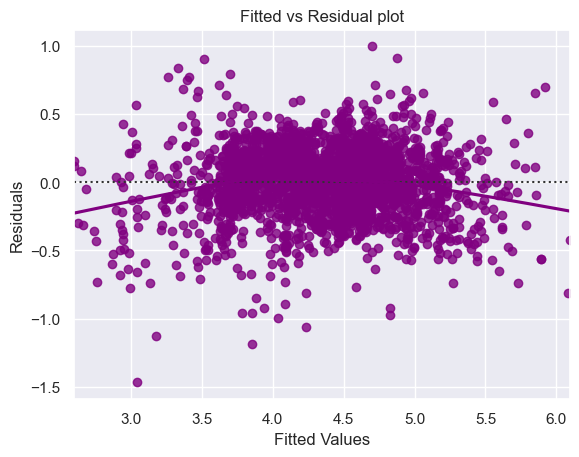

In [326]:
# Let's plot the fitted values vs residuals

sns.residplot(
    data = df_pred, x="Fitted Values", y="Residuals", color="Purple", lowess = True
)
plt.xlabel("Fitted Values")
plt.ylabel("Residuals")
plt.title("Fitted vs Residual plot")
plt.show()

In [327]:
# This scatter plot shows the distribution of residuals vs fitted values.
# There is a non-linear pattern in the data and a pattern means that the model doesn't capture non linear effects.
# We see no pattern so the requirements of linearity and independence is satisfied.

# Test for Normality

# We will test for normality by checking the distribution of residuals, by checking the Q-Q plot of residuals, and by using the Shapiro-Wilk test.
# If the residuals follow a normal distribution, they will make a straight line plot, otherwise not.
# If the p-value of the Shapiro-Wilk test is greater than 0.05, we can say the residuals are normally distributed.

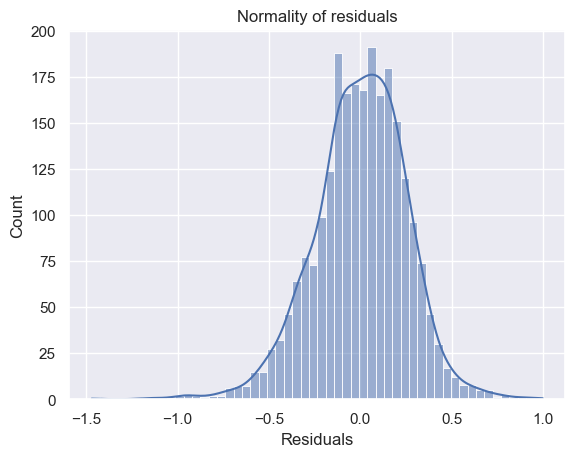

In [330]:
sns.histplot(data=df_pred, x="Residuals", kde="True")
plt.title("Normality of residuals")
plt.show()

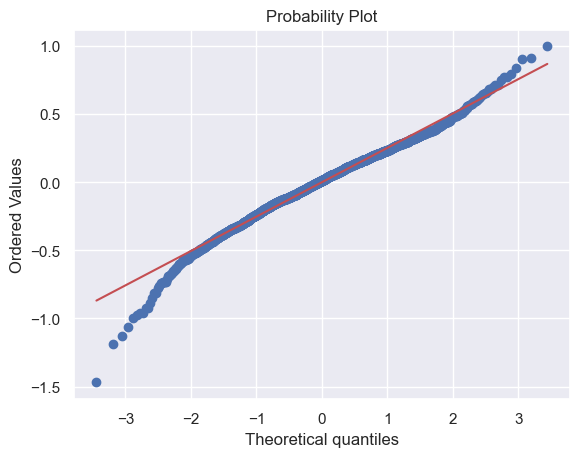

In [331]:
# The histogram is left skewed and has a bell shape
import pylab
import scipy.stats as stats

stats.probplot(df_pred["Residuals"],dist="norm", plot=pylab)
plt.show()

In [332]:
stats.shapiro(df_pred["Residuals"])

ShapiroResult(statistic=0.9856711030006409, pvalue=7.014141346325985e-15)

In [334]:
# The residual follows a straight line with the tails not following it so it is not linear and it is not normal since the p value is not greater than 0.05
# Test for Homoscedasticity
# We will test for homoscedasticity by using the goldfeldquandt test
# If we get a p-value greater than 0.05, we can say that the residuals are homoescedastic.
# Otherwise they are heteroscedastic

import statsmodels.stats.api as sms
from statsmodels.compat import lzip

name = ["F statistic", "p-value"]
test = sms.het_goldfeldquandt(df_pred["Residuals"], x_train3)
lzip(name, test)

[('F statistic', 1.035077512356109), ('p-value', 0.2756221333282653)]

In [339]:
# Since we get a p-value greater than 0.05, we can say that the residuals are homoscedastic
# Final Model Summary
# predictions on the test set
pred = olsmodel2.predict(x_test3)

df_pred_test = pd.DataFrame({"Actual": y_test, "Predicted": pred})
df_pred_test.sample(10, random_state=1)

,Actual,Predicted
1995,4.566741,4.562686
2341,3.696103,3.819960
1913,3.592093,3.649164
688,4.306495,4.294584
650,4.522115,4.812758
2291,4.259294,4.471814
40,4.997685,5.547810
1884,3.875359,4.090657
2538,4.206631,3.972632
45,5.380450,5.308860


In [340]:
# The actual and predicted results are very similar
x_train_final = x_train3.copy()
x_test_final = x_test3.copy()

olsmodel_final = sm.OLS(y_train, x_train_final).fit()
print(olsmodel_final.summary())

                              OLS Regression Results                             
Dep. Variable:     normalized_used_price   R-squared:                       0.811
Model:                               OLS   Adj. R-squared:                  0.810
Method:                    Least Squares   F-statistic:                     858.9
Date:                   Tue, 02 Jan 2024   Prob (F-statistic):               0.00
Time:                           11:02:59   Log-Likelihood:                -115.72
No. Observations:                   2417   AIC:                             257.4
Df Residuals:                       2404   BIC:                             332.7
Df Model:                             12                                         
Covariance Type:               nonrobust                                         
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
co

In [342]:
# Checking model performance on train set (seen 70% data)
print("Training Performance\n")
olsmodel_final_train_perf = model_performance_regression(olsmodel_final, x_train_final, y_train) 
olsmodel_final_train_perf

Training Performance



,RMSE,MAE,R-squared,Adj. R-squared,MAPE
0,0.253838,0.196434,0.810876,0.809853,4.713364


In [343]:
# Checking model performance on train set (seen 70% data)
print("Testing Performance\n")
olsmodel_final_test_perf = model_performance_regression(olsmodel_final, x_test_final, y_test) 
olsmodel_final_test_perf

Testing Performance



,RMSE,MAE,R-squared,Adj. R-squared,MAPE
0,0.263329,0.20119,0.807745,0.805302,4.914007


In [ ]:
# This model can explain at least around 81% of the variation in the data
# The model isn't suffering from overfitting because the RMSE and MAE values are somewhat comparable
# We can conclude that the model olsmodel_final is good for prediction

# Conclusions
# We can generally conclude that we can explain 81% of the variation in the data
# Model is good for prediction purposes
# The biggest factors that influence the normalized_used_price is the Screen Size which when you increase by a unit, it increases the price by at least 0.0297 units.
# 4g and 5g influence the normalized_used_price because when the unit increases by 1 unit, 4g and 5g gain at least 0.1051 and 0.1397 units respectively.
# The bigger the battery and screen size, the bigger the price of the phone.